## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce_TechNovan.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

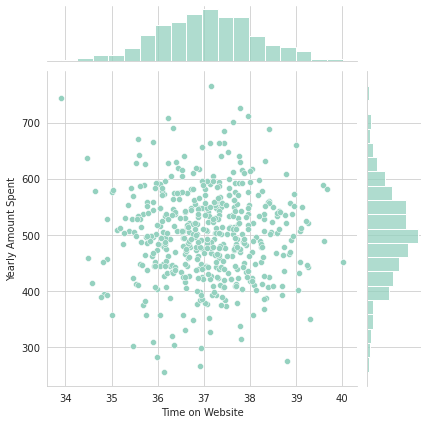

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

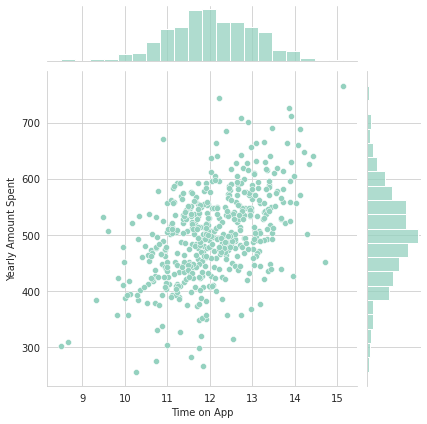

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

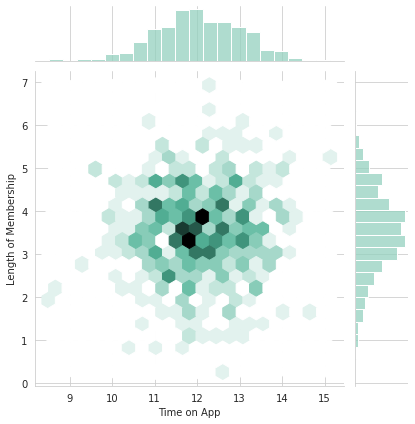

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

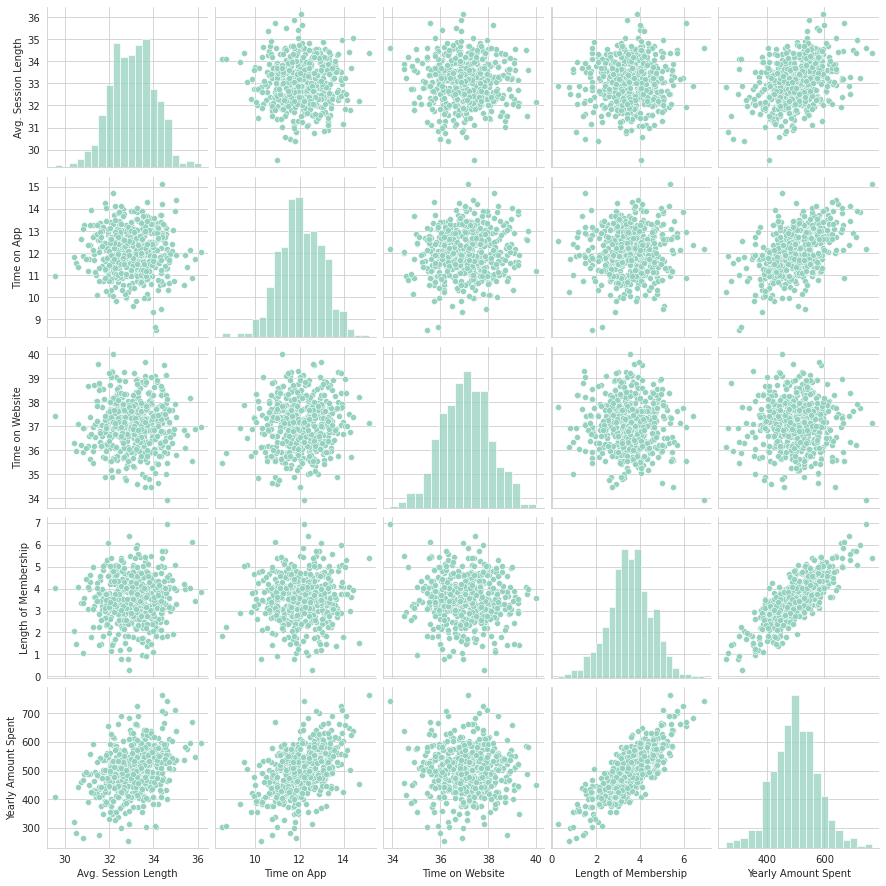

In [10]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [11]:
# Length of Membership 

<AxesSubplot:>

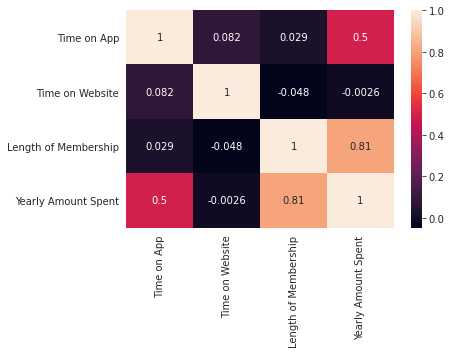

In [12]:
corr=customers.iloc[:,3:].corr() 
columns=corr.columns 
sns.heatmap(corr,annot=True)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

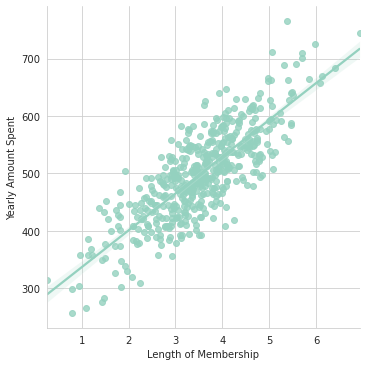

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
y = customers['Yearly Amount Spent'].values

In [15]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [18]:
#Multiple-Linear_Regression Approach

In [19]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [20]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [22]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.88815047 38.87046474  0.47066154 61.78369022]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [23]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[438.46 449.07]
 [489.66 482.6 ]
 [370.07 374.27]
 [513.86 513.15]
 [495.7  502.77]
 [450.89 461.78]
 [458.01 466.42]
 [336.67 327.38]
 [528.52 528.22]
 [663.28 657.02]
 [559.42 571.47]
 [526.02 523.63]
 [552.21 546.56]
 [457.68 467.43]
 [450.16 439.89]
 [431.65 445.06]
 [563.59 553.99]
 [408.35 403.77]
 [599.62 595.8 ]
 [486.85 490.74]
 [716.65 712.4 ]
 [496.79 502.09]
 [411.5  398.16]
 [556.55 570.45]
 [551.85 549.86]
 [398.18 392.99]
 [421.31 419.94]
 [395.15 407.66]
 [548.53 521.14]
 [463.49 463.75]
 [558.44 556.3 ]
 [505.53 506.55]
 [505.88 514.34]
 [463.95 476.77]
 [425.98 418.6 ]
 [401.07 403.82]
 [503.6  506.13]
 [430.34 436.72]
 [569.63 558.95]
 [421.89 421.33]
 [487.27 478.26]
 [602.37 593.92]
 [616.45 632.12]
 [589.39 591.44]
 [449.73 444.29]
 [379.93 392.2 ]
 [558.17 558.43]
 [462.72 447.19]
 [502.17 475.73]
 [401.43 420.74]
 [523.85 527.78]
 [416.8  421.97]
 [576.87 576.03]
 [478.5  460.06]
 [457.25 452.63]
 [397.68 408.64]
 [564.87 557.25]
 [305.13 298.76]
 [562.63 555.0

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

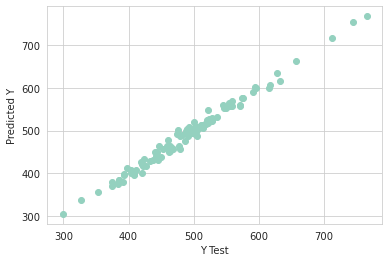

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [30]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

MAE: 7.645674798915309
MSE: 92.89010304498535
RMSE: 9.637951185028141


0.9861924261981547

In [32]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9860808498442004

In [33]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = lm, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_Score: 98.28 %
Standard Deviation: 0.23 %


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/home/nishant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


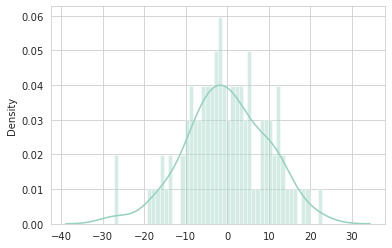

In [34]:
sns.distplot((y_test-y_pred),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [35]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


In [36]:
#Polynomial Regression Approach

In [37]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor1 = LinearRegression()
regressor1.fit(X_poly, y_train)

LinearRegression()

In [39]:
y_pred1 = regressor1.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[442.12 449.07]
 [488.87 482.6 ]
 [363.88 374.27]
 [514.45 513.15]
 [497.08 502.77]
 [444.88 461.78]
 [460.49 466.42]
 [337.17 327.38]
 [528.86 528.22]
 [680.78 657.02]
 [557.72 571.47]
 [524.57 523.63]
 [549.74 546.56]
 [449.19 467.43]
 [454.37 439.89]
 [435.73 445.06]
 [564.66 553.99]
 [399.45 403.77]
 [599.25 595.8 ]
 [486.46 490.74]
 [697.5  712.4 ]
 [496.16 502.09]
 [411.06 398.16]
 [555.96 570.45]
 [550.87 549.86]
 [399.06 392.99]
 [425.1  419.94]
 [387.61 407.66]
 [550.94 521.14]
 [463.34 463.75]
 [559.91 556.3 ]
 [503.05 506.55]
 [506.08 514.34]
 [463.51 476.77]
 [428.65 418.6 ]
 [404.54 403.82]
 [501.8  506.13]
 [426.13 436.72]
 [568.54 558.95]
 [422.71 421.33]
 [487.99 478.26]
 [600.38 593.92]
 [610.55 632.12]
 [595.84 591.44]
 [446.61 444.29]
 [377.72 392.2 ]
 [563.39 558.43]
 [463.74 447.19]
 [500.37 475.73]
 [401.82 420.74]
 [527.05 527.78]
 [416.83 421.97]
 [573.33 576.03]
 [481.34 460.06]
 [454.39 452.63]
 [462.66 408.64]
 [573.6  557.25]
 [310.52 298.76]
 [565.71 555.0

Text(0, 0.5, 'Predicted Y')

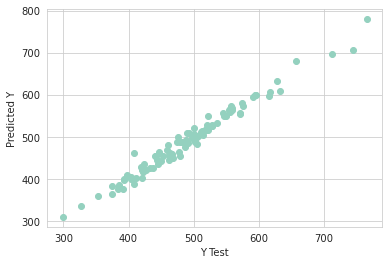

In [40]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/nishant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


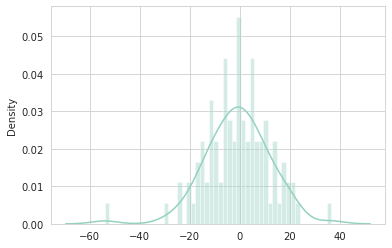

In [41]:
sns.distplot((y_test-y_pred1),bins=50);

In [43]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred1)
r2_score

MAE: 9.82141148119106
MSE: 168.11460061294125
RMSE: 12.965901457783074


0.9750107419516288

In [44]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9748088085532581

In [45]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores1 = cross_val_score(estimator = regressor1, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores1.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores1.std()*100))

R2_Scores: 98.28 %
Standard Deviation: 0.23 %


In [46]:
#Decision-Tree Regression Approach

In [47]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
y_pred2 = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[407.7  449.07]
 [469.31 482.6 ]
 [282.47 374.27]
 [514.09 513.15]
 [507.44 502.77]
 [472.99 461.78]
 [484.52 466.42]
 [282.47 327.38]
 [483.54 528.22]
 [725.58 657.02]
 [553.6  571.47]
 [537.77 523.63]
 [543.13 546.56]
 [432.47 467.43]
 [470.45 439.89]
 [444.58 445.06]
 [528.31 553.99]
 [413.37 403.77]
 [529.23 595.8 ]
 [469.31 490.74]
 [666.13 712.4 ]
 [518.79 502.09]
 [422.43 398.16]
 [561.87 570.45]
 [521.88 549.86]
 [392.29 392.99]
 [436.58 419.94]
 [357.78 407.66]
 [547.37 521.14]
 [443.97 463.75]
 [571.22 556.3 ]
 [492.95 506.55]
 [552.94 514.34]
 [483.16 476.77]
 [479.73 418.6 ]
 [408.96 403.82]
 [538.94 506.13]
 [436.28 436.72]
 [560.44 558.95]
 [470.45 421.33]
 [521.2  478.26]
 [584.11 593.92]
 [608.27 632.12]
 [507.21 591.44]
 [424.73 444.29]
 [390.1  392.2 ]
 [529.06 558.43]
 [436.58 447.19]
 [537.77 475.73]
 [434.02 420.74]
 [469.38 527.78]
 [422.37 421.97]
 [570.63 576.03]
 [479.25 460.06]
 [426.15 452.63]
 [473.36 408.64]
 [616.66 557.25]
 [357.86 298.76]
 [592.69 555.0

Text(0, 0.5, 'Predicted Y')

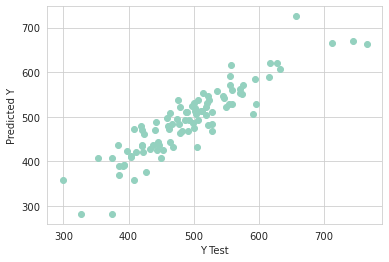

In [50]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

/home/nishant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


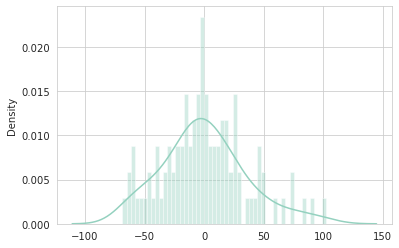

In [51]:
sns.distplot((y_test-y_pred2),bins=50);

In [53]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred2)
r2_score

MAE: 26.892548590834977
MSE: 1236.1748298235352
RMSE: 35.159278004867154


0.8162497980381623

In [54]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.814764947921299

In [55]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["mse", "mae"]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(regressor2,param_dist, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 90, 'max_features': 4, 'max_depth': 8, 'criterion': 'mae'}
Best score is 0.8466409974698272


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83 0.83 0.85 0.72  nan 0.71  nan  nan 0.65 0.79]
  warnings.warn(


In [ ]:
#Hyperparameter tuning with GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["mse", "mae"]} 

grid_search = GridSearchCV(estimator = regressor2,
                           param_grid = param_grid,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_r2_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best R2_score: {:.2f} %".format(best_r2_score*100))
print("Best Parameters:", best_parameters)

Best R2_score: 85.31 %
Best Parameters: {'criterion': 'mae', 'max_depth': 12, 'max_features': 4, 'max_leaf_nodes': 90, 'min_samples_leaf': 2, 'min_samples_split': 2}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.49 0.49 0.49 ...  nan  nan  nan]
  warnings.warn(


In [57]:
#Updated Decision Tree Regressor with best Hyperparameters Selected
regressor2_new = DecisionTreeRegressor(random_state = 0,criterion='mae',max_depth=12,max_leaf_nodes=90,min_samples_leaf=2,min_samples_split=2)
regressor2_new.fit(X_train, y_train)
y_pred2_new = regressor2_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2_new.reshape(len(y_pred2_new),1), y_test.reshape(len(y_test),1)),1))

[[444.58 449.07]
 [507.57 482.6 ]
 [404.99 374.27]
 [494.64 513.15]
 [510.35 502.77]
 [476.92 461.78]
 [416.05 466.42]
 [404.99 327.38]
 [537.83 528.22]
 [593.03 657.02]
 [545.95 571.47]
 [529.21 523.63]
 [519.73 546.56]
 [477.01 467.43]
 [444.58 439.89]
 [444.58 445.06]
 [581.8  553.99]
 [409.07 403.77]
 [583.08 595.8 ]
 [507.57 490.74]
 [660.43 712.4 ]
 [529.21 502.09]
 [432.33 398.16]
 [573.63 570.45]
 [520.56 549.86]
 [396.66 392.99]
 [444.58 419.94]
 [381.55 407.66]
 [552.94 521.14]
 [492.95 463.75]
 [564.41 556.3 ]
 [492.95 506.55]
 [510.35 514.34]
 [483.16 476.77]
 [486.46 418.6 ]
 [409.07 403.82]
 [479.23 506.13]
 [432.33 436.72]
 [561.32 558.95]
 [444.58 421.33]
 [475.6  478.26]
 [581.8  593.92]
 [660.43 632.12]
 [593.12 591.44]
 [432.33 444.29]
 [390.1  392.2 ]
 [578.24 558.43]
 [477.01 447.19]
 [492.05 475.73]
 [408.62 420.74]
 [493.18 527.78]
 [409.07 421.97]
 [545.95 576.03]
 [479.23 460.06]
 [432.33 452.63]
 [475.6  408.64]
 [495.18 557.25]
 [275.92 298.76]
 [552.94 555.0

In [58]:
# calculate these metrics by hand #Updated Decision Tree Regressor with best Hyperparameters Selected!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred2_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_new)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred2_new)
r2_score

MAE: 22.48641147460595
MSE: 908.9150795793047
RMSE: 30.14821851418927


0.8648950573903059

In [59]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.8638033002783084

In [60]:
#K-Cross Validation #Updated Decision Tree Regressor with best Hyperparameters Selected
from sklearn.model_selection import cross_val_score
r2_scores2 = cross_val_score(estimator = regressor2_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores2.std()*100))

R2_Scores: 85.31 %
Standard Deviation: 4.30 %


In [ ]:
#Random_Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [62]:
y_pred3 = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[450.06 449.07]
 [484.13 482.6 ]
 [360.82 374.27]
 [511.59 513.15]
 [507.46 502.77]
 [473.97 461.78]
 [466.3  466.42]
 [358.53 327.38]
 [516.88 528.22]
 [678.65 657.02]
 [549.47 571.47]
 [525.7  523.63]
 [516.98 546.56]
 [442.03 467.43]
 [464.68 439.89]
 [419.76 445.06]
 [554.89 553.99]
 [411.66 403.77]
 [550.29 595.8 ]
 [486.47 490.74]
 [657.62 712.4 ]
 [507.95 502.09]
 [426.38 398.16]
 [554.61 570.45]
 [545.95 549.86]
 [397.89 392.99]
 [425.83 419.94]
 [395.28 407.66]
 [565.81 521.14]
 [469.82 463.75]
 [558.14 556.3 ]
 [507.52 506.55]
 [517.52 514.34]
 [467.23 476.77]
 [484.75 418.6 ]
 [402.58 403.82]
 [505.82 506.13]
 [432.17 436.72]
 [568.92 558.95]
 [439.63 421.33]
 [512.25 478.26]
 [582.72 593.92]
 [606.41 632.12]
 [574.54 591.44]
 [432.4  444.29]
 [388.04 392.2 ]
 [544.28 558.43]
 [429.21 447.19]
 [506.2  475.73]
 [417.5  420.74]
 [512.79 527.78]
 [417.3  421.97]
 [567.85 576.03]
 [481.14 460.06]
 [447.81 452.63]
 [484.72 408.64]
 [554.37 557.25]
 [321.94 298.76]
 [566.59 555.0

Text(0, 0.5, 'Predicted Y')

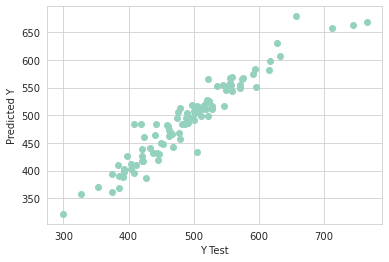

In [63]:
plt.scatter(y_test,y_pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [65]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred3)
r2_score

MAE: 17.19715224746501
MSE: 632.4352909562855
RMSE: 25.14826616202965


0.905992170656314

In [66]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9052325114292943

In [67]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist1 = {"n_estimators": [20,30,50,100],
               "max_features": ['auto', 'sqrt', 'log2',5,10],
               "min_samples_split" : [2,4,6,8,10,20],
               "criterion": ["mse", "mae"],
               "max_depth": [2, 6, 8,10,12],
               "bootstrap": [True, False]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv1 = RandomizedSearchCV(regressor3,param_dist1, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv1.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv1.best_params_)) 
print("Best score is {}".format(tree_cv1.best_score_)) 

/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91 0.59  nan 0.91 0.49 0.91 0.62  nan  nan  nan]
  warnings.warn(


Tuned Random Forest Parameters: {'n_estimators': 30, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'mae', 'bootstrap': False}
Best score is 0.9139519601054117


In [69]:
#Updated Random Forest Regressor with best Hyperparameters Selected
regressor3_new = RandomForestRegressor(n_estimators = 30, random_state = 0,criterion='mae',max_depth=8,max_features='log2',min_samples_split=4,bootstrap=False)
regressor3_new.fit(X_train, y_train)
y_pred3_new = regressor3_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3_new.reshape(len(y_pred3_new),1), y_test.reshape(len(y_test),1)),1))



[[451.49 449.07]
 [482.81 482.6 ]
 [383.46 374.27]
 [518.7  513.15]
 [512.23 502.77]
 [491.43 461.78]
 [455.37 466.42]
 [372.82 327.38]
 [527.5  528.22]
 [630.62 657.02]
 [568.27 571.47]
 [522.36 523.63]
 [517.97 546.56]
 [447.73 467.43]
 [458.07 439.89]
 [427.88 445.06]
 [569.52 553.99]
 [417.05 403.77]
 [559.23 595.8 ]
 [485.34 490.74]
 [653.03 712.4 ]
 [498.03 502.09]
 [421.32 398.16]
 [556.96 570.45]
 [545.   549.86]
 [402.68 392.99]
 [438.76 419.94]
 [387.67 407.66]
 [560.65 521.14]
 [472.12 463.75]
 [559.67 556.3 ]
 [505.08 506.55]
 [510.31 514.34]
 [468.88 476.77]
 [475.79 418.6 ]
 [410.13 403.82]
 [513.7  506.13]
 [426.94 436.72]
 [564.4  558.95]
 [441.1  421.33]
 [493.05 478.26]
 [584.65 593.92]
 [626.8  632.12]
 [572.97 591.44]
 [436.98 444.29]
 [399.67 392.2 ]
 [524.81 558.43]
 [452.44 447.19]
 [499.13 475.73]
 [424.16 420.74]
 [504.28 527.78]
 [418.67 421.97]
 [564.04 576.03]
 [485.21 460.06]
 [437.6  452.63]
 [454.62 408.64]
 [554.06 557.25]
 [317.22 298.76]
 [570.63 555.0

In [70]:
# calculate these metrics by hand #Updated Random Forest Regressor with best Hyperparameters Selected!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred3_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3_new)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred3_new)
r2_score

MAE: 16.792435420526388
MSE: 588.0010281930992
RMSE: 24.24873250693939


0.9125970654978683

In [71]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9118907791584572

In [72]:
#K-Cross Validation #Updated Random Forest Regressor with best Hyperparameters Selected
from sklearn.model_selection import cross_val_score
r2_scores3 = cross_val_score(estimator = regressor3_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores3.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores3.std()*100))


R2_Scores: 91.40 %
Standard Deviation: 2.18 %


In [73]:
### Gradient Boosting Regressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor


In [75]:
regressor4 = GradientBoostingRegressor()
regressor4.fit(X_train, y_train)

GradientBoostingRegressor()

In [77]:
y_pred4 = regressor4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[451.8  449.07]
 [482.91 482.6 ]
 [372.39 374.27]
 [522.96 513.15]
 [512.42 502.77]
 [468.17 461.78]
 [463.59 466.42]
 [349.11 327.38]
 [525.66 528.22]
 [667.52 657.02]
 [565.37 571.47]
 [511.8  523.63]
 [525.31 546.56]
 [462.91 467.43]
 [455.4  439.89]
 [433.82 445.06]
 [553.16 553.99]
 [416.11 403.77]
 [559.61 595.8 ]
 [491.79 490.74]
 [688.59 712.4 ]
 [513.1  502.09]
 [408.58 398.16]
 [560.39 570.45]
 [554.63 549.86]
 [405.11 392.99]
 [437.85 419.94]
 [401.7  407.66]
 [556.69 521.14]
 [471.56 463.75]
 [554.14 556.3 ]
 [504.55 506.55]
 [505.41 514.34]
 [465.88 476.77]
 [466.01 418.6 ]
 [393.83 403.82]
 [494.29 506.13]
 [420.29 436.72]
 [567.6  558.95]
 [424.88 421.33]
 [510.48 478.26]
 [594.77 593.92]
 [615.6  632.12]
 [577.52 591.44]
 [432.29 444.29]
 [389.9  392.2 ]
 [548.41 558.43]
 [447.39 447.19]
 [497.18 475.73]
 [404.23 420.74]
 [515.35 527.78]
 [413.42 421.97]
 [565.91 576.03]
 [475.16 460.06]
 [447.24 452.63]
 [473.88 408.64]
 [555.46 557.25]
 [303.33 298.76]
 [573.4  555.0

In [78]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred4)
r2_score

MAE: 12.51010479407404
MSE: 318.6723966705519
RMSE: 17.85139761112703


0.9526312008340797

In [79]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9522484226590016

In [81]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {'learning_rate':[1,0.50,0.25,0.15,0.1,0.05,0.01,0.005,0.001],
           'n_estimators':[50,100,250,500,750,1000,1500],
           'max_depth':[2,3,4,5,6,7,8,9,10,12,14,16],
           'min_samples_split':[2,4,8,10,20,40,60,100],
           'min_samples_leaf':[1,3,5,7,9,10,20],
           'max_features':[2,3,4,'auto', 'sqrt', 'log2'],
           'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1],
           'loss' : ['ls', 'lad', 'huber', 'quantile']}

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(regressor4,param_dist, cv = 10,scoring = "r2",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Gradient Boosting Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 4, 'loss': 'ls', 'learning_rate': 0.01}
Best score is 0.9586529438442415


In [82]:
tree_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='log2',
                          min_samples_leaf=3, min_samples_split=20,
                          n_estimators=500, subsample=0.8)

In [83]:
regressor_4_new = GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='log2',
                          min_samples_leaf=3, min_samples_split=20,
                          n_estimators=500, subsample=0.8)
regressor_4_new.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='log2',
                          min_samples_leaf=3, min_samples_split=20,
                          n_estimators=500, subsample=0.8)

In [84]:
y_pred4_new = regressor_4_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4_new.reshape(len(y_pred4_new),1), y_test.reshape(len(y_test),1)),1))

[[447.4  449.07]
 [481.93 482.6 ]
 [382.23 374.27]
 [520.57 513.15]
 [506.59 502.77]
 [466.14 461.78]
 [462.28 466.42]
 [365.26 327.38]
 [520.46 528.22]
 [647.33 657.02]
 [556.31 571.47]
 [520.07 523.63]
 [525.23 546.56]
 [470.42 467.43]
 [451.82 439.89]
 [431.25 445.06]
 [553.3  553.99]
 [411.35 403.77]
 [566.02 595.8 ]
 [485.18 490.74]
 [681.43 712.4 ]
 [506.34 502.09]
 [418.16 398.16]
 [555.49 570.45]
 [551.45 549.86]
 [409.67 392.99]
 [437.23 419.94]
 [402.02 407.66]
 [557.29 521.14]
 [472.78 463.75]
 [548.46 556.3 ]
 [501.63 506.55]
 [505.83 514.34]
 [463.21 476.77]
 [462.43 418.6 ]
 [405.21 403.82]
 [502.21 506.13]
 [433.2  436.72]
 [567.06 558.95]
 [424.03 421.33]
 [499.11 478.26]
 [587.92 593.92]
 [611.15 632.12]
 [576.52 591.44]
 [443.23 444.29]
 [389.35 392.2 ]
 [549.28 558.43]
 [448.66 447.19]
 [501.24 475.73]
 [410.37 420.74]
 [512.87 527.78]
 [418.56 421.97]
 [569.05 576.03]
 [469.71 460.06]
 [449.08 452.63]
 [454.12 408.64]
 [547.24 557.25]
 [313.86 298.76]
 [563.14 555.0

In [85]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred4_new)
r2_score

0.9553497543235427

In [86]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9549889442574704

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred4_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4_new)))

MAE: 11.995227880605066
MSE: 300.38339692348706
RMSE: 17.331572257688773


In [88]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = regressor_4_new, X = X_train, y = y_train, cv = 10,scoring='r2')
print("R2_score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_score: 95.78 %
Standard Deviation: 1.23 %


In [90]:
#ADABOOST Regressor

In [91]:
from sklearn.ensemble import AdaBoostRegressor
regressor5 = AdaBoostRegressor(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Regressor
regressor5.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1)

In [92]:
y_pred5 = regressor5.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

[[445.39 449.07]
 [487.22 482.6 ]
 [362.28 374.27]
 [524.21 513.15]
 [516.61 502.77]
 [500.88 461.78]
 [444.48 466.42]
 [365.65 327.38]
 [501.1  528.22]
 [676.77 657.02]
 [556.13 571.47]
 [524.21 523.63]
 [480.69 546.56]
 [429.4  467.43]
 [455.77 439.89]
 [422.47 445.06]
 [554.81 553.99]
 [407.66 403.77]
 [530.54 595.8 ]
 [488.41 490.74]
 [626.26 712.4 ]
 [503.57 502.09]
 [417.61 398.16]
 [540.95 570.45]
 [532.63 549.86]
 [442.63 392.99]
 [422.47 419.94]
 [408.01 407.66]
 [555.27 521.14]
 [486.95 463.75]
 [570.6  556.3 ]
 [503.57 506.55]
 [501.1  514.34]
 [468.45 476.77]
 [515.07 418.6 ]
 [383.84 403.82]
 [456.4  506.13]
 [414.72 436.72]
 [555.12 558.95]
 [442.61 421.33]
 [526.29 478.26]
 [574.14 593.92]
 [582.41 632.12]
 [574.47 591.44]
 [423.64 444.29]
 [414.17 392.2 ]
 [502.25 558.43]
 [426.63 447.19]
 [519.68 475.73]
 [414.75 420.74]
 [505.87 527.78]
 [410.04 421.97]
 [571.23 576.03]
 [444.43 460.06]
 [425.84 452.63]
 [516.61 408.64]
 [574.14 557.25]
 [319.69 298.76]
 [555.12 555.0

In [93]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred5)
r2_score

0.8123762323908086

In [94]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 25.66951297779104
MSE: 1262.234144609607
RMSE: 35.52793470791128


In [95]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.8108600807333606

In [96]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid
param_dist = {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,30,50,100,200],
              'learning_rate': [0.01,0.1,0.5,0.8,1],
              'loss' : ['linear', 'square', 'exponential']
             }
  

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(regressor5,param_dist, cv = 10,scoring = "r2",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Adaboost Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Adaboost Parameters: {'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.8}
Best score is 0.8753509393997344


In [97]:
tree_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.8, n_estimators=100)

In [98]:
regressor5_new = AdaBoostRegressor(learning_rate=0.8, n_estimators=100)
regressor5_new.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.8, n_estimators=100)

In [99]:
y_pred5_new = regressor5_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5_new.reshape(len(y_pred5_new),1), y_test.reshape(len(y_test),1)),1))

[[446.58 449.07]
 [494.82 482.6 ]
 [355.89 374.27]
 [517.76 513.15]
 [519.96 502.77]
 [499.03 461.78]
 [448.38 466.42]
 [357.07 327.38]
 [510.31 528.22]
 [665.54 657.02]
 [566.11 571.47]
 [525.6  523.63]
 [491.45 546.56]
 [424.23 467.43]
 [461.03 439.89]
 [422.31 445.06]
 [553.06 553.99]
 [406.78 403.77]
 [553.55 595.8 ]
 [494.38 490.74]
 [630.26 712.4 ]
 [506.2  502.09]
 [410.69 398.16]
 [553.06 570.45]
 [537.14 549.86]
 [444.73 392.99]
 [421.56 419.94]
 [406.68 407.66]
 [561.88 521.14]
 [491.45 463.75]
 [565.28 556.3 ]
 [522.29 506.55]
 [506.2  514.34]
 [477.27 476.77]
 [499.1  418.6 ]
 [387.01 403.82]
 [466.73 506.13]
 [409.18 436.72]
 [566.11 558.95]
 [438.31 421.33]
 [522.29 478.26]
 [573.36 593.92]
 [579.71 632.12]
 [579.37 591.44]
 [421.56 444.29]
 [410.69 392.2 ]
 [506.67 558.43]
 [423.9  447.19]
 [510.96 475.73]
 [407.63 420.74]
 [513.05 527.78]
 [413.65 421.97]
 [571.07 576.03]
 [448.38 460.06]
 [421.56 452.63]
 [497.85 408.64]
 [559.94 557.25]
 [310.6  298.76]
 [557.25 555.0

In [100]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred5_new)
r2_score

0.842760092441216

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred5_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5_new)))

MAE: 23.401292929729806
MSE: 1057.8274956580312
RMSE: 32.52426010930965


In [102]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.8414894669255895

In [103]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = regressor5_new, X = X_train, y = y_train, cv = 10,scoring='r2')
print("R2_score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_score: 87.26 %
Standard Deviation: 2.46 %


In [104]:
#### LightGBM (Light Gradient Boosting Machine)

In [105]:
import lightgbm as lgb
  
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMRegressor


In [106]:
regressor6 = LGBMRegressor()
regressor6.fit(X_train, y_train)

LGBMRegressor()

In [107]:
y_pred6 = regressor6.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[453.08 449.07]
 [478.42 482.6 ]
 [338.24 374.27]
 [516.46 513.15]
 [495.58 502.77]
 [457.04 461.78]
 [456.94 466.42]
 [336.85 327.38]
 [533.03 528.22]
 [641.72 657.02]
 [551.16 571.47]
 [515.31 523.63]
 [520.28 546.56]
 [418.29 467.43]
 [450.35 439.89]
 [379.84 445.06]
 [553.67 553.99]
 [390.61 403.77]
 [552.83 595.8 ]
 [488.47 490.74]
 [679.78 712.4 ]
 [500.85 502.09]
 [403.35 398.16]
 [556.63 570.45]
 [556.57 549.86]
 [400.83 392.99]
 [400.26 419.94]
 [379.57 407.66]
 [561.79 521.14]
 [473.61 463.75]
 [572.8  556.3 ]
 [507.1  506.55]
 [504.65 514.34]
 [458.78 476.77]
 [463.65 418.6 ]
 [405.18 403.82]
 [501.81 506.13]
 [426.07 436.72]
 [571.69 558.95]
 [430.89 421.33]
 [500.53 478.26]
 [596.43 593.92]
 [616.72 632.12]
 [604.7  591.44]
 [453.01 444.29]
 [382.3  392.2 ]
 [554.36 558.43]
 [404.44 447.19]
 [499.82 475.73]
 [402.98 420.74]
 [515.72 527.78]
 [413.2  421.97]
 [579.9  576.03]
 [486.9  460.06]
 [453.4  452.63]
 [460.87 408.64]
 [574.28 557.25]
 [343.21 298.76]
 [581.15 555.0

In [108]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred6)
r2_score

0.911180705088928

In [109]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

MAE: 17.07568894454065
MSE: 597.5295569718282
RMSE: 24.444417705722266


In [110]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.910462973412879

In [121]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {
'max_depth':[2,3,4,5,6,7,8,10,12,14,16,18,20],
'num_leaves':[10,20,30,40,50,60,70,80],
'learning_rate': [0.01,0.02,0.04,0.05,0.1,0.2,0.5,1],
'n_estimators':[50,100,200,500,1000],
'min_data_in_leaf':[100,200,300,500,800,1000],
'colsample_bytree': [0.5,1.0],
'subsample': [0.5,1.0],
'subsample_freq':[0,1],
'feature_fraction':[0.8,1.0],
'bagging_fraction':[0.8,1.0]

}


# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(regressor6,param_dist, cv = 10,scoring = "r2",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned LightGBM Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned LightGBM Parameters: {'subsample_freq': 0, 'subsample': 0.5, 'num_leaves': 70, 'n_estimators': 1000, 'min_data_in_leaf': 100, 'max_depth': 4, 'learning_rate': 0.04, 'feature_fraction': 0.8, 'colsample_bytree': 0.5, 'bagging_fraction': 0.8}
Best score is 0.7882309945183298


In [122]:
#No need of using these hyperparameters since R2_Score is decreased

In [123]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = regressor6, X = X_train, y = y_train, cv = 10,scoring='r2')
print("R2_score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_score: 93.68 %
Standard Deviation: 1.89 %


In [124]:
#Support_Vector_Kernel Regression

In [125]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
y = y.reshape(len(y),1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


In [127]:
X_train = sc_X.fit_transform(X_train)

In [128]:
y_train = y_train.reshape(len(y_train),1)
y_train

array([[378.33],
       [478.6 ],
       [595.82],
       [492.56],
       [521.57],
       [444.05],
       [422.43],
       [501.93],
       [282.47],
       [503.98],
       [582.49],
       [549.9 ],
       [433.05],
       [570.2 ],
       [392.29],
       [486.95],
       [478.95],
       [463.59],
       [496.55],
       [524.64],
       [556.19],
       [416.36],
       [407.8 ],
       [594.27],
       [493.18],
       [538.77],
       [547.37],
       [411.19],
       [503.18],
       [589.03],
       [515.5 ],
       [436.28],
       [510.16],
       [483.67],
       [451.73],
       [510.4 ],
       [537.92],
       [534.77],
       [478.18],
       [425.75],
       [434.02],
       [384.63],
       [578.24],
       [619.9 ],
       [597.74],
       [599.41],
       [564.79],
       [533.04],
       [409.07],
       [637.1 ],
       [472.99],
       [583.98],
       [482.35],
       [627.6 ],
       [514.24],
       [436.52],
       [408.62],
       [534.71],
       [410.6 

In [129]:
y_train = sc_y.fit_transform(y_train)

In [130]:
from sklearn.svm import SVR
regressor4 = SVR(kernel = 'linear')
regressor4.fit(X_train, y_train)

/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [131]:
y_pred4 = sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[438.6  449.07]
 [489.81 482.6 ]
 [370.31 374.27]
 [513.87 513.15]
 [495.82 502.77]
 [450.64 461.78]
 [458.36 466.42]
 [336.74 327.38]
 [529.01 528.22]
 [663.21 657.02]
 [559.55 571.47]
 [526.15 523.63]
 [552.98 546.56]
 [458.22 467.43]
 [450.18 439.89]
 [431.88 445.06]
 [564.03 553.99]
 [408.62 403.77]
 [600.44 595.8 ]
 [487.02 490.74]
 [717.25 712.4 ]
 [497.01 502.09]
 [411.7  398.16]
 [556.79 570.45]
 [552.36 549.86]
 [398.17 392.99]
 [421.67 419.94]
 [395.33 407.66]
 [548.87 521.14]
 [463.47 463.75]
 [558.44 556.3 ]
 [505.6  506.55]
 [506.06 514.34]
 [464.09 476.77]
 [425.82 418.6 ]
 [401.43 403.82]
 [504.16 506.13]
 [430.75 436.72]
 [569.91 558.95]
 [421.8  421.33]
 [487.48 478.26]
 [602.9  593.92]
 [616.65 632.12]
 [589.66 591.44]
 [450.05 444.29]
 [379.91 392.2 ]
 [558.68 558.43]
 [463.13 447.19]
 [502.09 475.73]
 [401.53 420.74]
 [524.3  527.78]
 [417.08 421.97]
 [576.92 576.03]
 [478.91 460.06]
 [457.74 452.63]
 [397.14 408.64]
 [564.69 557.25]
 [305.3  298.76]
 [563.15 555.0

Text(0, 0.5, 'Predicted Y')

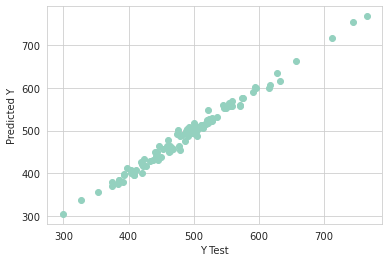

In [132]:
plt.scatter(y_test,y_pred4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [147]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred4)
r2_score

MAE: 7.6843015938068815
MSE: 93.41165186473
RMSE: 9.664970349914686


0.9861149009981192

In [148]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))

In [149]:
adj_r2

0.986002698177902

In [134]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(regressor4,param_dist2, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVR Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVR Parameters: {'kernel': 'linear', 'epsilon': 0.01, 'degree': 3, 'C': 1}
Best score is 0.9826657471082113


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [135]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = regressor4,
                           param_grid = parameters2,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_r21 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_r21*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 98.28 %
Best Parameters: {'C': 0.5, 'degree': 1, 'epsilon': 0.1, 'kernel': 'linear'}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [136]:
#Updated SVR with hyperparameter tuning
regressor4_new = SVR(kernel = 'linear',C=0.5,degree=1,epsilon=0.1)
regressor4_new.fit(X_train, y_train)
y_pred4_new = sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_test)))
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred4_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4_new)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4_new)

MAE: 7.6843015938068815
MSE: 93.41165186473
RMSE: 9.664970349914686


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9861149009981192

In [137]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores4 = cross_val_score(estimator = regressor4_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores4.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores4.std()*100))


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

R2_Scores: 98.28 %
Standard Deviation: 0.23 %


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [138]:
#XGBoost Regression

In [157]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
from xgboost import XGBRegressor
regressor5 = XGBRegressor()
regressor5.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
y_pred5 = regressor5.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

[[445.71 449.07]
 [484.88 482.6 ]
 [371.78 374.27]
 [509.31 513.15]
 [502.61 502.77]
 [429.75 461.78]
 [466.51 466.42]
 [345.86 327.38]
 [541.68 528.22]
 [656.61 657.02]
 [557.76 571.47]
 [517.87 523.63]
 [535.37 546.56]
 [454.13 467.43]
 [450.54 439.89]
 [438.57 445.06]
 [553.64 553.99]
 [404.56 403.77]
 [581.15 595.8 ]
 [494.2  490.74]
 [694.98 712.4 ]
 [517.3  502.09]
 [411.89 398.16]
 [557.9  570.45]
 [565.11 549.86]
 [389.44 392.99]
 [445.41 419.94]
 [375.92 407.66]
 [553.92 521.14]
 [476.68 463.75]
 [516.07 556.3 ]
 [500.19 506.55]
 [502.03 514.34]
 [460.58 476.77]
 [474.72 418.6 ]
 [390.8  403.82]
 [514.39 506.13]
 [428.74 436.72]
 [586.5  558.95]
 [437.23 421.33]
 [502.5  478.26]
 [595.91 593.92]
 [609.95 632.12]
 [589.84 591.44]
 [439.21 444.29]
 [389.96 392.2 ]
 [560.21 558.43]
 [462.41 447.19]
 [496.75 475.73]
 [406.05 420.74]
 [522.5  527.78]
 [409.55 421.97]
 [577.75 576.03]
 [471.52 460.06]
 [459.94 452.63]
 [477.32 408.64]
 [554.21 557.25]
 [306.03 298.76]
 [584.3  555.0

In [160]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred5)

MAE: 14.776471380453994
MSE: 399.5443024197929
RMSE: 19.98860431395331


0.9406100621925632

In [161]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist6 = {"n_estimators": [10,30,50,100,200],
              "min_child_weight":[1,2,3,4,5,6,7],
              "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
              "max_depth": [3,4,5,6,7,8,9,10,12,15],
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(3,10)],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv6 = RandomizedSearchCV(regressor5,param_dist6, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv6.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv6.best_params_)) 
print("Best score is {}".format(tree_cv6.best_score_)) 

Tuned XGboost Parameters: {'subsample': 0.8, 'reg_alpha': 0.01, 'n_estimators': 30, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.9}
Best score is 0.9563345029679743


In [162]:
tree_cv6.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
#Updated XGBoost Regressor with best Hyperparameters Selected
regressor5_new = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=3,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)
regressor5_new.fit(X_train, y_train)
y_pred5_new = regressor5_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5_new.reshape(len(y_pred5_new),1), y_test.reshape(len(y_test),1)),1))


[[441.08 449.07]
 [480.28 482.6 ]
 [365.7  374.27]
 [518.2  513.15]
 [499.3  502.77]
 [458.99 461.78]
 [452.89 466.42]
 [339.2  327.38]
 [527.83 528.22]
 [653.72 657.02]
 [567.75 571.47]
 [515.78 523.63]
 [526.67 546.56]
 [460.05 467.43]
 [441.42 439.89]
 [445.09 445.06]
 [554.63 553.99]
 [411.42 403.77]
 [563.24 595.8 ]
 [484.04 490.74]
 [675.96 712.4 ]
 [510.31 502.09]
 [421.08 398.16]
 [561.36 570.45]
 [557.15 549.86]
 [390.34 392.99]
 [450.07 419.94]
 [401.64 407.66]
 [570.4  521.14]
 [465.96 463.75]
 [535.48 556.3 ]
 [496.55 506.55]
 [506.41 514.34]
 [456.95 476.77]
 [455.15 418.6 ]
 [394.12 403.82]
 [501.71 506.13]
 [425.97 436.72]
 [568.12 558.95]
 [415.3  421.33]
 [496.36 478.26]
 [588.4  593.92]
 [607.89 632.12]
 [576.94 591.44]
 [440.91 444.29]
 [393.96 392.2 ]
 [557.96 558.43]
 [454.69 447.19]
 [511.4  475.73]
 [406.42 420.74]
 [499.37 527.78]
 [419.9  421.97]
 [581.99 576.03]
 [483.78 460.06]
 [448.9  452.63]
 [448.17 408.64]
 [536.66 557.25]
 [300.73 298.76]
 [573.47 555.0

In [167]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred5_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5_new)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred5_new)
r2_score

MAE: 12.903620409570767
MSE: 313.3442296587554
RMSE: 17.70153184497758


0.9534232018851314

In [168]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9530468237185467

In [169]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = regressor5_new, X = X_train, y = y_train, cv = 10,scoring='r2')
print("R2_score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_score: 95.63 %
Standard Deviation: 1.22 %


In [170]:
#CatBoost Regression

In [171]:
from catboost import CatBoostRegressor
regressor6 = CatBoostRegressor()
regressor6.fit(X_train,y_train)

Learning rate set to 0.033156
0:	learn: 76.8368300	total: 88.2ms	remaining: 1m 28s
1:	learn: 75.3254496	total: 89.4ms	remaining: 44.6s
2:	learn: 73.9470815	total: 90.6ms	remaining: 30.1s
3:	learn: 72.3334106	total: 91.8ms	remaining: 22.9s
4:	learn: 70.9867067	total: 93ms	remaining: 18.5s
5:	learn: 69.5420478	total: 94.1ms	remaining: 15.6s
6:	learn: 68.2103316	total: 95.3ms	remaining: 13.5s
7:	learn: 66.9492271	total: 96.5ms	remaining: 12s
8:	learn: 65.7467161	total: 97.6ms	remaining: 10.7s
9:	learn: 64.4294680	total: 98.7ms	remaining: 9.78s
10:	learn: 63.1529702	total: 99.9ms	remaining: 8.98s
11:	learn: 61.8575290	total: 101ms	remaining: 8.32s
12:	learn: 60.8059050	total: 102ms	remaining: 7.76s
13:	learn: 59.6573068	total: 103ms	remaining: 7.28s
14:	learn: 58.5667411	total: 105ms	remaining: 6.87s
15:	learn: 57.4539789	total: 106ms	remaining: 6.5s
16:	learn: 56.3587811	total: 107ms	remaining: 6.18s
17:	learn: 55.4595430	total: 108ms	remaining: 5.89s
18:	learn: 54.3810920	total: 109ms	re

234:	learn: 9.3918592	total: 486ms	remaining: 1.58s
235:	learn: 9.3772800	total: 489ms	remaining: 1.58s
236:	learn: 9.3630808	total: 492ms	remaining: 1.58s
237:	learn: 9.3505524	total: 497ms	remaining: 1.59s
238:	learn: 9.3401732	total: 500ms	remaining: 1.59s
239:	learn: 9.3233052	total: 502ms	remaining: 1.59s
240:	learn: 9.3031340	total: 504ms	remaining: 1.59s
241:	learn: 9.2885031	total: 506ms	remaining: 1.58s
242:	learn: 9.2727896	total: 507ms	remaining: 1.58s
243:	learn: 9.2639422	total: 509ms	remaining: 1.58s
244:	learn: 9.2548931	total: 511ms	remaining: 1.57s
245:	learn: 9.2357220	total: 513ms	remaining: 1.57s
246:	learn: 9.2216369	total: 514ms	remaining: 1.57s
247:	learn: 9.2105335	total: 516ms	remaining: 1.56s
248:	learn: 9.2039774	total: 518ms	remaining: 1.56s
249:	learn: 9.1845511	total: 520ms	remaining: 1.56s
250:	learn: 9.1767544	total: 521ms	remaining: 1.55s
251:	learn: 9.1666983	total: 523ms	remaining: 1.55s
252:	learn: 9.1572982	total: 525ms	remaining: 1.55s
253:	learn: 

513:	learn: 6.8544961	total: 845ms	remaining: 799ms
514:	learn: 6.8424382	total: 847ms	remaining: 798ms
515:	learn: 6.8276809	total: 849ms	remaining: 797ms
516:	learn: 6.8221035	total: 851ms	remaining: 795ms
517:	learn: 6.8182513	total: 853ms	remaining: 794ms
518:	learn: 6.8109087	total: 855ms	remaining: 792ms
519:	learn: 6.8087190	total: 857ms	remaining: 791ms
520:	learn: 6.7984396	total: 858ms	remaining: 789ms
521:	learn: 6.7942424	total: 860ms	remaining: 787ms
522:	learn: 6.7900718	total: 862ms	remaining: 786ms
523:	learn: 6.7895080	total: 863ms	remaining: 784ms
524:	learn: 6.7779206	total: 865ms	remaining: 783ms
525:	learn: 6.7685196	total: 867ms	remaining: 781ms
526:	learn: 6.7628752	total: 869ms	remaining: 780ms
527:	learn: 6.7580239	total: 870ms	remaining: 778ms
528:	learn: 6.7503054	total: 872ms	remaining: 777ms
529:	learn: 6.7430882	total: 874ms	remaining: 775ms
530:	learn: 6.7289712	total: 876ms	remaining: 774ms
531:	learn: 6.7197401	total: 877ms	remaining: 772ms
532:	learn: 

805:	learn: 5.1369629	total: 1.2s	remaining: 290ms
806:	learn: 5.1336310	total: 1.21s	remaining: 288ms
807:	learn: 5.1288366	total: 1.21s	remaining: 287ms
808:	learn: 5.1220193	total: 1.21s	remaining: 286ms
809:	learn: 5.1190761	total: 1.21s	remaining: 284ms
810:	learn: 5.1172683	total: 1.21s	remaining: 283ms
811:	learn: 5.1075501	total: 1.22s	remaining: 281ms
812:	learn: 5.1028324	total: 1.22s	remaining: 280ms
813:	learn: 5.0993245	total: 1.22s	remaining: 278ms
814:	learn: 5.0960238	total: 1.22s	remaining: 277ms
815:	learn: 5.0879137	total: 1.22s	remaining: 276ms
816:	learn: 5.0857106	total: 1.22s	remaining: 274ms
817:	learn: 5.0854630	total: 1.23s	remaining: 273ms
818:	learn: 5.0852630	total: 1.23s	remaining: 271ms
819:	learn: 5.0790960	total: 1.23s	remaining: 270ms
820:	learn: 5.0722182	total: 1.23s	remaining: 268ms
821:	learn: 5.0666878	total: 1.23s	remaining: 267ms
822:	learn: 5.0572807	total: 1.24s	remaining: 266ms
823:	learn: 5.0548914	total: 1.24s	remaining: 264ms
824:	learn: 5

In [172]:
y_pred6 = regressor6.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[440.58 449.07]
 [488.32 482.6 ]
 [361.92 374.27]
 [512.49 513.15]
 [496.06 502.77]
 [457.02 461.78]
 [454.16 466.42]
 [339.67 327.38]
 [531.02 528.22]
 [645.88 657.02]
 [555.71 571.47]
 [524.3  523.63]
 [534.84 546.56]
 [445.57 467.43]
 [455.71 439.89]
 [438.51 445.06]
 [561.85 553.99]
 [402.1  403.77]
 [577.33 595.8 ]
 [484.27 490.74]
 [668.18 712.4 ]
 [496.85 502.09]
 [410.28 398.16]
 [556.95 570.45]
 [547.52 549.86]
 [398.99 392.99]
 [422.34 419.94]
 [388.17 407.66]
 [558.26 521.14]
 [463.89 463.75]
 [547.53 556.3 ]
 [508.77 506.55]
 [504.1  514.34]
 [463.22 476.77]
 [456.43 418.6 ]
 [406.97 403.82]
 [503.89 506.13]
 [427.03 436.72]
 [568.2  558.95]
 [417.7  421.33]
 [492.55 478.26]
 [596.05 593.92]
 [616.44 632.12]
 [585.26 591.44]
 [445.36 444.29]
 [379.93 392.2 ]
 [555.23 558.43]
 [451.57 447.19]
 [500.59 475.73]
 [403.47 420.74]
 [526.44 527.78]
 [415.45 421.97]
 [578.53 576.03]
 [476.92 460.06]
 [452.25 452.63]
 [452.31 408.64]
 [548.78 557.25]
 [299.79 298.76]
 [571.44 555.0

In [175]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred6)
r2_score

MAE: 11.801930700729237
MSE: 290.54804106706655
RMSE: 17.045469810687724


0.9568117227938454

In [174]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores4 = cross_val_score(estimator = regressor6, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores4.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores4.std()*100))


Learning rate set to 0.03254
0:	learn: 78.0267342	total: 1.7ms	remaining: 1.7s
1:	learn: 76.6577650	total: 3.54ms	remaining: 1.77s
2:	learn: 75.1359646	total: 5.67ms	remaining: 1.89s
3:	learn: 73.5213305	total: 7.36ms	remaining: 1.83s
4:	learn: 72.2276846	total: 9.08ms	remaining: 1.81s
5:	learn: 70.8478887	total: 11.1ms	remaining: 1.83s
6:	learn: 69.4864632	total: 12.8ms	remaining: 1.82s
7:	learn: 68.1163153	total: 14.5ms	remaining: 1.79s
8:	learn: 66.9029891	total: 16.1ms	remaining: 1.77s
9:	learn: 65.6160655	total: 17.8ms	remaining: 1.76s
10:	learn: 64.2974500	total: 19.6ms	remaining: 1.76s
11:	learn: 63.0157242	total: 21.3ms	remaining: 1.75s
12:	learn: 61.9179698	total: 23.1ms	remaining: 1.75s
13:	learn: 60.8473364	total: 24.7ms	remaining: 1.74s
14:	learn: 59.7128366	total: 26.6ms	remaining: 1.75s
15:	learn: 58.5308540	total: 28.3ms	remaining: 1.74s
16:	learn: 57.5124221	total: 30.2ms	remaining: 1.75s
17:	learn: 56.6203222	total: 31.9ms	remaining: 1.74s
18:	learn: 55.5345408	total: 

225:	learn: 9.6702251	total: 359ms	remaining: 1.23s
226:	learn: 9.6544909	total: 364ms	remaining: 1.24s
227:	learn: 9.6264050	total: 365ms	remaining: 1.24s
228:	learn: 9.6116867	total: 367ms	remaining: 1.24s
229:	learn: 9.5877179	total: 369ms	remaining: 1.24s
230:	learn: 9.5674601	total: 371ms	remaining: 1.24s
231:	learn: 9.5451513	total: 373ms	remaining: 1.23s
232:	learn: 9.5302685	total: 374ms	remaining: 1.23s
233:	learn: 9.5120331	total: 376ms	remaining: 1.23s
234:	learn: 9.4876439	total: 378ms	remaining: 1.23s
235:	learn: 9.4690882	total: 380ms	remaining: 1.23s
236:	learn: 9.4525717	total: 382ms	remaining: 1.23s
237:	learn: 9.4361267	total: 384ms	remaining: 1.23s
238:	learn: 9.4174178	total: 386ms	remaining: 1.23s
239:	learn: 9.4015307	total: 388ms	remaining: 1.23s
240:	learn: 9.3867965	total: 389ms	remaining: 1.23s
241:	learn: 9.3714168	total: 391ms	remaining: 1.22s
242:	learn: 9.3562762	total: 393ms	remaining: 1.22s
243:	learn: 9.3285025	total: 395ms	remaining: 1.22s
244:	learn: 

505:	learn: 6.7058481	total: 720ms	remaining: 703ms
506:	learn: 6.7005074	total: 724ms	remaining: 704ms
507:	learn: 6.6892945	total: 726ms	remaining: 703ms
508:	learn: 6.6797402	total: 728ms	remaining: 702ms
509:	learn: 6.6725323	total: 732ms	remaining: 703ms
510:	learn: 6.6717154	total: 734ms	remaining: 702ms
511:	learn: 6.6710909	total: 735ms	remaining: 701ms
512:	learn: 6.6583246	total: 737ms	remaining: 700ms
513:	learn: 6.6438064	total: 739ms	remaining: 699ms
514:	learn: 6.6430952	total: 741ms	remaining: 698ms
515:	learn: 6.6378415	total: 743ms	remaining: 697ms
516:	learn: 6.6304871	total: 745ms	remaining: 696ms
517:	learn: 6.6298241	total: 746ms	remaining: 694ms
518:	learn: 6.6157018	total: 748ms	remaining: 693ms
519:	learn: 6.6131734	total: 750ms	remaining: 692ms
520:	learn: 6.5993711	total: 752ms	remaining: 691ms
521:	learn: 6.5863661	total: 754ms	remaining: 690ms
522:	learn: 6.5806161	total: 755ms	remaining: 689ms
523:	learn: 6.5744196	total: 757ms	remaining: 688ms
524:	learn: 

791:	learn: 4.9406478	total: 1.08s	remaining: 284ms
792:	learn: 4.9308116	total: 1.08s	remaining: 283ms
793:	learn: 4.9235908	total: 1.09s	remaining: 282ms
794:	learn: 4.9224271	total: 1.09s	remaining: 281ms
795:	learn: 4.9174052	total: 1.09s	remaining: 280ms
796:	learn: 4.9147001	total: 1.09s	remaining: 278ms
797:	learn: 4.9113086	total: 1.09s	remaining: 277ms
798:	learn: 4.9058588	total: 1.1s	remaining: 276ms
799:	learn: 4.9028764	total: 1.1s	remaining: 274ms
800:	learn: 4.9024328	total: 1.1s	remaining: 273ms
801:	learn: 4.8968662	total: 1.1s	remaining: 272ms
802:	learn: 4.8946072	total: 1.1s	remaining: 271ms
803:	learn: 4.8895730	total: 1.1s	remaining: 269ms
804:	learn: 4.8850358	total: 1.11s	remaining: 268ms
805:	learn: 4.8775118	total: 1.11s	remaining: 267ms
806:	learn: 4.8706789	total: 1.11s	remaining: 265ms
807:	learn: 4.8652728	total: 1.11s	remaining: 264ms
808:	learn: 4.8621719	total: 1.11s	remaining: 263ms
809:	learn: 4.8598626	total: 1.11s	remaining: 262ms
810:	learn: 4.8522

Learning rate set to 0.03254
0:	learn: 76.9148482	total: 1.33ms	remaining: 1.33s
1:	learn: 75.5889565	total: 2.64ms	remaining: 1.32s
2:	learn: 74.0937182	total: 3.9ms	remaining: 1.29s
3:	learn: 72.5867820	total: 5.09ms	remaining: 1.27s
4:	learn: 71.3065221	total: 6.25ms	remaining: 1.24s
5:	learn: 69.9119968	total: 7.37ms	remaining: 1.22s
6:	learn: 68.6839410	total: 8.56ms	remaining: 1.21s
7:	learn: 67.3631861	total: 9.92ms	remaining: 1.23s
8:	learn: 66.1558303	total: 11.1ms	remaining: 1.22s
9:	learn: 64.8905084	total: 12.2ms	remaining: 1.21s
10:	learn: 63.6398119	total: 13.6ms	remaining: 1.23s
11:	learn: 62.3679952	total: 14.9ms	remaining: 1.23s
12:	learn: 61.3342882	total: 16ms	remaining: 1.22s
13:	learn: 60.4015964	total: 17.1ms	remaining: 1.21s
14:	learn: 59.3384165	total: 18.2ms	remaining: 1.2s
15:	learn: 58.2534465	total: 19.3ms	remaining: 1.19s
16:	learn: 57.1798472	total: 20.5ms	remaining: 1.19s
17:	learn: 56.3229616	total: 21.7ms	remaining: 1.18s
18:	learn: 55.2531286	total: 22

285:	learn: 8.6329930	total: 361ms	remaining: 900ms
286:	learn: 8.6228825	total: 363ms	remaining: 901ms
287:	learn: 8.5981014	total: 365ms	remaining: 902ms
288:	learn: 8.5875287	total: 367ms	remaining: 902ms
289:	learn: 8.5828656	total: 369ms	remaining: 902ms
290:	learn: 8.5665745	total: 370ms	remaining: 903ms
291:	learn: 8.5460974	total: 372ms	remaining: 903ms
292:	learn: 8.5363280	total: 374ms	remaining: 902ms
293:	learn: 8.5310406	total: 376ms	remaining: 902ms
294:	learn: 8.5232653	total: 377ms	remaining: 902ms
295:	learn: 8.5181065	total: 379ms	remaining: 902ms
296:	learn: 8.4983225	total: 381ms	remaining: 902ms
297:	learn: 8.4786419	total: 383ms	remaining: 902ms
298:	learn: 8.4707196	total: 385ms	remaining: 902ms
299:	learn: 8.4641305	total: 387ms	remaining: 902ms
300:	learn: 8.4425472	total: 388ms	remaining: 902ms
301:	learn: 8.4299025	total: 390ms	remaining: 902ms
302:	learn: 8.4179147	total: 392ms	remaining: 902ms
303:	learn: 8.3996896	total: 394ms	remaining: 901ms
304:	learn: 

475:	learn: 6.9997694	total: 724ms	remaining: 797ms
476:	learn: 6.9816207	total: 727ms	remaining: 797ms
477:	learn: 6.9710041	total: 730ms	remaining: 797ms
478:	learn: 6.9621100	total: 735ms	remaining: 799ms
479:	learn: 6.9468377	total: 737ms	remaining: 798ms
480:	learn: 6.9401006	total: 744ms	remaining: 803ms
481:	learn: 6.9294086	total: 746ms	remaining: 802ms
482:	learn: 6.9230064	total: 748ms	remaining: 800ms
483:	learn: 6.9199873	total: 750ms	remaining: 800ms
484:	learn: 6.9083918	total: 753ms	remaining: 800ms
485:	learn: 6.8965088	total: 755ms	remaining: 799ms
486:	learn: 6.8887626	total: 757ms	remaining: 798ms
487:	learn: 6.8830126	total: 759ms	remaining: 796ms
488:	learn: 6.8704505	total: 761ms	remaining: 795ms
489:	learn: 6.8547402	total: 764ms	remaining: 795ms
490:	learn: 6.8494073	total: 766ms	remaining: 794ms
491:	learn: 6.8481851	total: 768ms	remaining: 793ms
492:	learn: 6.8427657	total: 770ms	remaining: 792ms
493:	learn: 6.8274713	total: 772ms	remaining: 791ms
494:	learn: 

660:	learn: 5.6243477	total: 1.09s	remaining: 558ms
661:	learn: 5.6182632	total: 1.09s	remaining: 557ms
662:	learn: 5.6104685	total: 1.09s	remaining: 556ms
663:	learn: 5.6093697	total: 1.09s	remaining: 554ms
664:	learn: 5.6081545	total: 1.1s	remaining: 553ms
665:	learn: 5.5990866	total: 1.1s	remaining: 551ms
666:	learn: 5.5841028	total: 1.1s	remaining: 549ms
667:	learn: 5.5818408	total: 1.1s	remaining: 548ms
668:	learn: 5.5771259	total: 1.1s	remaining: 546ms
669:	learn: 5.5709947	total: 1.1s	remaining: 545ms
670:	learn: 5.5704268	total: 1.11s	remaining: 543ms
671:	learn: 5.5681447	total: 1.11s	remaining: 541ms
672:	learn: 5.5626181	total: 1.11s	remaining: 540ms
673:	learn: 5.5618277	total: 1.11s	remaining: 538ms
674:	learn: 5.5588793	total: 1.11s	remaining: 537ms
675:	learn: 5.5488293	total: 1.12s	remaining: 535ms
676:	learn: 5.5463935	total: 1.12s	remaining: 533ms
677:	learn: 5.5387674	total: 1.12s	remaining: 532ms
678:	learn: 5.5380470	total: 1.12s	remaining: 531ms
679:	learn: 5.5351

836:	learn: 4.7894017	total: 1.46s	remaining: 284ms
837:	learn: 4.7869630	total: 1.46s	remaining: 283ms
838:	learn: 4.7810842	total: 1.47s	remaining: 281ms
839:	learn: 4.7749553	total: 1.47s	remaining: 280ms
840:	learn: 4.7731925	total: 1.48s	remaining: 279ms
841:	learn: 4.7717074	total: 1.48s	remaining: 278ms
842:	learn: 4.7677132	total: 1.48s	remaining: 276ms
843:	learn: 4.7586593	total: 1.49s	remaining: 275ms
844:	learn: 4.7518117	total: 1.49s	remaining: 273ms
845:	learn: 4.7506223	total: 1.49s	remaining: 271ms
846:	learn: 4.7424136	total: 1.49s	remaining: 270ms
847:	learn: 4.7393212	total: 1.49s	remaining: 268ms
848:	learn: 4.7301952	total: 1.5s	remaining: 267ms
849:	learn: 4.7297436	total: 1.5s	remaining: 265ms
850:	learn: 4.7289831	total: 1.5s	remaining: 263ms
851:	learn: 4.7279153	total: 1.5s	remaining: 261ms
852:	learn: 4.7252951	total: 1.51s	remaining: 260ms
853:	learn: 4.7193838	total: 1.51s	remaining: 259ms
854:	learn: 4.7170510	total: 1.52s	remaining: 257ms
855:	learn: 4.70

Learning rate set to 0.03254
0:	learn: 77.2486593	total: 3.23ms	remaining: 3.23s
1:	learn: 75.9161894	total: 4.63ms	remaining: 2.31s
2:	learn: 74.4123847	total: 6.84ms	remaining: 2.27s
3:	learn: 72.9725875	total: 9.5ms	remaining: 2.36s
4:	learn: 71.6411932	total: 12.2ms	remaining: 2.43s
5:	learn: 70.4000064	total: 14.9ms	remaining: 2.47s
6:	learn: 69.0683495	total: 17.4ms	remaining: 2.46s
7:	learn: 67.7180291	total: 19.9ms	remaining: 2.47s
8:	learn: 66.4822435	total: 23ms	remaining: 2.54s
9:	learn: 65.2278589	total: 27.2ms	remaining: 2.69s
10:	learn: 63.9697030	total: 30.3ms	remaining: 2.73s
11:	learn: 62.7796292	total: 33.7ms	remaining: 2.77s
12:	learn: 61.8087634	total: 38.1ms	remaining: 2.89s
13:	learn: 60.7119405	total: 43.1ms	remaining: 3.03s
14:	learn: 59.6405016	total: 45.3ms	remaining: 2.98s
15:	learn: 58.4938388	total: 54.4ms	remaining: 3.34s
16:	learn: 57.3402552	total: 56.4ms	remaining: 3.26s
17:	learn: 56.4623450	total: 58.5ms	remaining: 3.19s
18:	learn: 55.4405537	total: 6

284:	learn: 8.6270773	total: 536ms	remaining: 1.34s
285:	learn: 8.6168667	total: 539ms	remaining: 1.34s
286:	learn: 8.5965338	total: 540ms	remaining: 1.34s
287:	learn: 8.5657945	total: 542ms	remaining: 1.34s
288:	learn: 8.5626568	total: 544ms	remaining: 1.34s
289:	learn: 8.5524461	total: 546ms	remaining: 1.34s
290:	learn: 8.5345666	total: 548ms	remaining: 1.33s
291:	learn: 8.5298130	total: 549ms	remaining: 1.33s
292:	learn: 8.5120722	total: 551ms	remaining: 1.33s
293:	learn: 8.4847094	total: 553ms	remaining: 1.33s
294:	learn: 8.4805259	total: 554ms	remaining: 1.32s
295:	learn: 8.4699913	total: 556ms	remaining: 1.32s
296:	learn: 8.4650574	total: 558ms	remaining: 1.32s
297:	learn: 8.4404661	total: 560ms	remaining: 1.32s
298:	learn: 8.4370190	total: 562ms	remaining: 1.32s
299:	learn: 8.4335556	total: 563ms	remaining: 1.31s
300:	learn: 8.4297453	total: 565ms	remaining: 1.31s
301:	learn: 8.4216929	total: 567ms	remaining: 1.31s
302:	learn: 8.4176985	total: 569ms	remaining: 1.31s
303:	learn: 

493:	learn: 6.6656288	total: 1.08s	remaining: 1.11s
494:	learn: 6.6614020	total: 1.09s	remaining: 1.11s
495:	learn: 6.6608098	total: 1.09s	remaining: 1.11s
496:	learn: 6.6593412	total: 1.09s	remaining: 1.1s
497:	learn: 6.6504894	total: 1.09s	remaining: 1.1s
498:	learn: 6.6481993	total: 1.09s	remaining: 1.1s
499:	learn: 6.6375695	total: 1.09s	remaining: 1.09s
500:	learn: 6.6294890	total: 1.1s	remaining: 1.09s
501:	learn: 6.6209979	total: 1.1s	remaining: 1.09s
502:	learn: 6.6204345	total: 1.1s	remaining: 1.09s
503:	learn: 6.6090546	total: 1.1s	remaining: 1.08s
504:	learn: 6.6001277	total: 1.1s	remaining: 1.08s
505:	learn: 6.5882630	total: 1.11s	remaining: 1.08s
506:	learn: 6.5793388	total: 1.11s	remaining: 1.08s
507:	learn: 6.5681870	total: 1.11s	remaining: 1.07s
508:	learn: 6.5623141	total: 1.11s	remaining: 1.07s
509:	learn: 6.5497579	total: 1.11s	remaining: 1.07s
510:	learn: 6.5482978	total: 1.11s	remaining: 1.07s
511:	learn: 6.5374152	total: 1.12s	remaining: 1.06s
512:	learn: 6.536935

764:	learn: 4.8377378	total: 1.65s	remaining: 507ms
765:	learn: 4.8335714	total: 1.65s	remaining: 505ms
766:	learn: 4.8282242	total: 1.65s	remaining: 503ms
767:	learn: 4.8251294	total: 1.66s	remaining: 501ms
768:	learn: 4.8189155	total: 1.66s	remaining: 498ms
769:	learn: 4.8129231	total: 1.66s	remaining: 496ms
770:	learn: 4.8105071	total: 1.66s	remaining: 494ms
771:	learn: 4.8101221	total: 1.66s	remaining: 492ms
772:	learn: 4.8029786	total: 1.67s	remaining: 489ms
773:	learn: 4.7996471	total: 1.67s	remaining: 487ms
774:	learn: 4.7987176	total: 1.67s	remaining: 485ms
775:	learn: 4.7930663	total: 1.67s	remaining: 482ms
776:	learn: 4.7864350	total: 1.67s	remaining: 480ms
777:	learn: 4.7776542	total: 1.67s	remaining: 478ms
778:	learn: 4.7710328	total: 1.68s	remaining: 476ms
779:	learn: 4.7707677	total: 1.68s	remaining: 473ms
780:	learn: 4.7658885	total: 1.68s	remaining: 471ms
781:	learn: 4.7647860	total: 1.68s	remaining: 469ms
782:	learn: 4.7600644	total: 1.68s	remaining: 467ms
783:	learn: 

Learning rate set to 0.03254
0:	learn: 77.4086271	total: 2.31ms	remaining: 2.31s
1:	learn: 76.0332501	total: 4.98ms	remaining: 2.49s
2:	learn: 74.5325067	total: 6.39ms	remaining: 2.12s
3:	learn: 72.9494742	total: 7.58ms	remaining: 1.89s
4:	learn: 71.7327025	total: 8.72ms	remaining: 1.74s
5:	learn: 70.3607167	total: 11.3ms	remaining: 1.87s
6:	learn: 69.0354507	total: 12.8ms	remaining: 1.82s
7:	learn: 67.7965282	total: 14ms	remaining: 1.74s
8:	learn: 66.5536460	total: 15.6ms	remaining: 1.72s
9:	learn: 65.2840457	total: 16.8ms	remaining: 1.66s
10:	learn: 64.0097720	total: 17.9ms	remaining: 1.61s
11:	learn: 62.7197527	total: 19ms	remaining: 1.56s
12:	learn: 61.6234668	total: 20.1ms	remaining: 1.52s
13:	learn: 60.6768808	total: 21.2ms	remaining: 1.49s
14:	learn: 59.5551967	total: 22.5ms	remaining: 1.48s
15:	learn: 58.5184647	total: 23.8ms	remaining: 1.47s
16:	learn: 57.4205652	total: 25.6ms	remaining: 1.48s
17:	learn: 56.4439060	total: 27.4ms	remaining: 1.49s
18:	learn: 55.3720682	total: 28

239:	learn: 9.4405357	total: 358ms	remaining: 1.13s
240:	learn: 9.4199692	total: 360ms	remaining: 1.14s
241:	learn: 9.4052694	total: 362ms	remaining: 1.13s
242:	learn: 9.3886142	total: 363ms	remaining: 1.13s
243:	learn: 9.3728249	total: 364ms	remaining: 1.13s
244:	learn: 9.3569584	total: 365ms	remaining: 1.13s
245:	learn: 9.3416596	total: 368ms	remaining: 1.13s
246:	learn: 9.3277490	total: 370ms	remaining: 1.13s
247:	learn: 9.3099884	total: 372ms	remaining: 1.13s
248:	learn: 9.2951525	total: 374ms	remaining: 1.13s
249:	learn: 9.2788240	total: 375ms	remaining: 1.13s
250:	learn: 9.2591893	total: 378ms	remaining: 1.13s
251:	learn: 9.2423701	total: 379ms	remaining: 1.13s
252:	learn: 9.2246495	total: 381ms	remaining: 1.13s
253:	learn: 9.2114464	total: 383ms	remaining: 1.13s
254:	learn: 9.2016953	total: 385ms	remaining: 1.13s
255:	learn: 9.1900882	total: 387ms	remaining: 1.12s
256:	learn: 9.1696708	total: 389ms	remaining: 1.12s
257:	learn: 9.1583105	total: 391ms	remaining: 1.12s
258:	learn: 

516:	learn: 6.5913853	total: 719ms	remaining: 671ms
517:	learn: 6.5847190	total: 721ms	remaining: 670ms
518:	learn: 6.5819591	total: 722ms	remaining: 670ms
519:	learn: 6.5783678	total: 726ms	remaining: 671ms
520:	learn: 6.5671714	total: 728ms	remaining: 670ms
521:	learn: 6.5638110	total: 730ms	remaining: 668ms
522:	learn: 6.5518336	total: 732ms	remaining: 667ms
523:	learn: 6.5431302	total: 733ms	remaining: 666ms
524:	learn: 6.5290293	total: 735ms	remaining: 665ms
525:	learn: 6.5169586	total: 737ms	remaining: 664ms
526:	learn: 6.5161731	total: 739ms	remaining: 663ms
527:	learn: 6.5059565	total: 741ms	remaining: 662ms
528:	learn: 6.4951422	total: 743ms	remaining: 661ms
529:	learn: 6.4812329	total: 745ms	remaining: 660ms
530:	learn: 6.4761083	total: 746ms	remaining: 659ms
531:	learn: 6.4667215	total: 748ms	remaining: 658ms
532:	learn: 6.4502159	total: 750ms	remaining: 657ms
533:	learn: 6.4495599	total: 752ms	remaining: 656ms
534:	learn: 6.4431716	total: 753ms	remaining: 655ms
535:	learn: 

720:	learn: 5.0491963	total: 1.08s	remaining: 418ms
721:	learn: 5.0448099	total: 1.08s	remaining: 417ms
722:	learn: 5.0440760	total: 1.09s	remaining: 416ms
723:	learn: 5.0397948	total: 1.09s	remaining: 416ms
724:	learn: 5.0336147	total: 1.09s	remaining: 415ms
725:	learn: 5.0237576	total: 1.09s	remaining: 413ms
726:	learn: 5.0219154	total: 1.1s	remaining: 415ms
727:	learn: 5.0112800	total: 1.1s	remaining: 413ms
728:	learn: 5.0068709	total: 1.11s	remaining: 412ms
729:	learn: 5.0045113	total: 1.11s	remaining: 411ms
730:	learn: 4.9954702	total: 1.11s	remaining: 409ms
731:	learn: 4.9902371	total: 1.11s	remaining: 408ms
732:	learn: 4.9780488	total: 1.12s	remaining: 408ms
733:	learn: 4.9708406	total: 1.12s	remaining: 407ms
734:	learn: 4.9658312	total: 1.13s	remaining: 407ms
735:	learn: 4.9632375	total: 1.14s	remaining: 407ms
736:	learn: 4.9525250	total: 1.14s	remaining: 406ms
737:	learn: 4.9522376	total: 1.15s	remaining: 407ms
738:	learn: 4.9462676	total: 1.15s	remaining: 406ms
739:	learn: 4.

886:	learn: 4.2784262	total: 1.46s	remaining: 186ms
887:	learn: 4.2776732	total: 1.46s	remaining: 184ms
888:	learn: 4.2694892	total: 1.46s	remaining: 183ms
889:	learn: 4.2658832	total: 1.46s	remaining: 181ms
890:	learn: 4.2617831	total: 1.47s	remaining: 179ms
891:	learn: 4.2595773	total: 1.47s	remaining: 178ms
892:	learn: 4.2504044	total: 1.47s	remaining: 176ms
893:	learn: 4.2448866	total: 1.47s	remaining: 174ms
894:	learn: 4.2406555	total: 1.47s	remaining: 173ms
895:	learn: 4.2346028	total: 1.48s	remaining: 171ms
896:	learn: 4.2292643	total: 1.48s	remaining: 170ms
897:	learn: 4.2253279	total: 1.48s	remaining: 168ms
898:	learn: 4.2223265	total: 1.48s	remaining: 166ms
899:	learn: 4.2166242	total: 1.48s	remaining: 165ms
900:	learn: 4.2047315	total: 1.49s	remaining: 163ms
901:	learn: 4.1971111	total: 1.49s	remaining: 162ms
902:	learn: 4.1934216	total: 1.49s	remaining: 160ms
903:	learn: 4.1842878	total: 1.49s	remaining: 158ms
904:	learn: 4.1786996	total: 1.5s	remaining: 157ms
905:	learn: 4

153:	learn: 12.5590224	total: 180ms	remaining: 989ms
154:	learn: 12.4854301	total: 182ms	remaining: 994ms
155:	learn: 12.4208946	total: 184ms	remaining: 997ms
156:	learn: 12.3586854	total: 186ms	remaining: 999ms
157:	learn: 12.2991656	total: 188ms	remaining: 1s
158:	learn: 12.2396331	total: 190ms	remaining: 1s
159:	learn: 12.1843866	total: 191ms	remaining: 1s
160:	learn: 12.1266582	total: 193ms	remaining: 1s
161:	learn: 12.0663839	total: 195ms	remaining: 1.01s
162:	learn: 12.0156914	total: 196ms	remaining: 1.01s
163:	learn: 11.9566280	total: 198ms	remaining: 1.01s
164:	learn: 11.8866605	total: 200ms	remaining: 1.01s
165:	learn: 11.8533354	total: 202ms	remaining: 1.01s
166:	learn: 11.8007221	total: 203ms	remaining: 1.01s
167:	learn: 11.7512543	total: 205ms	remaining: 1.02s
168:	learn: 11.6961179	total: 207ms	remaining: 1.02s
169:	learn: 11.6315009	total: 209ms	remaining: 1.02s
170:	learn: 11.5765069	total: 211ms	remaining: 1.02s
171:	learn: 11.5217216	total: 212ms	remaining: 1.02s
172:	

421:	learn: 7.6273915	total: 538ms	remaining: 737ms
422:	learn: 7.6264868	total: 542ms	remaining: 740ms
423:	learn: 7.6090622	total: 544ms	remaining: 739ms
424:	learn: 7.6066302	total: 546ms	remaining: 738ms
425:	learn: 7.6009636	total: 547ms	remaining: 738ms
426:	learn: 7.5962142	total: 549ms	remaining: 737ms
427:	learn: 7.5950724	total: 551ms	remaining: 737ms
428:	learn: 7.5941837	total: 553ms	remaining: 736ms
429:	learn: 7.5816734	total: 555ms	remaining: 735ms
430:	learn: 7.5719640	total: 556ms	remaining: 735ms
431:	learn: 7.5625385	total: 558ms	remaining: 734ms
432:	learn: 7.5515610	total: 560ms	remaining: 733ms
433:	learn: 7.5310600	total: 562ms	remaining: 733ms
434:	learn: 7.5269637	total: 564ms	remaining: 732ms
435:	learn: 7.5147327	total: 566ms	remaining: 732ms
436:	learn: 7.4955889	total: 567ms	remaining: 731ms
437:	learn: 7.4822279	total: 569ms	remaining: 730ms
438:	learn: 7.4681919	total: 571ms	remaining: 729ms
439:	learn: 7.4673806	total: 573ms	remaining: 729ms
440:	learn: 

697:	learn: 5.5470685	total: 899ms	remaining: 389ms
698:	learn: 5.5461229	total: 901ms	remaining: 388ms
699:	learn: 5.5349125	total: 905ms	remaining: 388ms
700:	learn: 5.5289168	total: 906ms	remaining: 387ms
701:	learn: 5.5265867	total: 908ms	remaining: 386ms
702:	learn: 5.5241573	total: 910ms	remaining: 384ms
703:	learn: 5.5154099	total: 912ms	remaining: 383ms
704:	learn: 5.5080926	total: 914ms	remaining: 383ms
705:	learn: 5.5012861	total: 916ms	remaining: 381ms
706:	learn: 5.4984621	total: 918ms	remaining: 380ms
707:	learn: 5.4980837	total: 920ms	remaining: 379ms
708:	learn: 5.4959570	total: 922ms	remaining: 378ms
709:	learn: 5.4936728	total: 924ms	remaining: 377ms
710:	learn: 5.4903841	total: 926ms	remaining: 376ms
711:	learn: 5.4871262	total: 927ms	remaining: 375ms
712:	learn: 5.4785303	total: 929ms	remaining: 374ms
713:	learn: 5.4699029	total: 932ms	remaining: 373ms
714:	learn: 5.4670296	total: 934ms	remaining: 372ms
715:	learn: 5.4561783	total: 936ms	remaining: 371ms
716:	learn: 

911:	learn: 4.4820088	total: 1.26s	remaining: 122ms
912:	learn: 4.4741137	total: 1.26s	remaining: 120ms
913:	learn: 4.4704879	total: 1.27s	remaining: 119ms
914:	learn: 4.4677150	total: 1.27s	remaining: 118ms
915:	learn: 4.4652920	total: 1.27s	remaining: 116ms
916:	learn: 4.4625250	total: 1.27s	remaining: 115ms
917:	learn: 4.4595984	total: 1.27s	remaining: 114ms
918:	learn: 4.4555932	total: 1.27s	remaining: 112ms
919:	learn: 4.4456523	total: 1.27s	remaining: 111ms
920:	learn: 4.4433616	total: 1.27s	remaining: 109ms
921:	learn: 4.4380395	total: 1.27s	remaining: 108ms
922:	learn: 4.4359469	total: 1.28s	remaining: 107ms
923:	learn: 4.4325303	total: 1.28s	remaining: 105ms
924:	learn: 4.4252074	total: 1.28s	remaining: 104ms
925:	learn: 4.4196831	total: 1.28s	remaining: 103ms
926:	learn: 4.4126998	total: 1.28s	remaining: 101ms
927:	learn: 4.4092055	total: 1.29s	remaining: 99.8ms
928:	learn: 4.4019409	total: 1.29s	remaining: 98.5ms
929:	learn: 4.3955187	total: 1.29s	remaining: 97.1ms
930:	lear

156:	learn: 12.2335566	total: 177ms	remaining: 952ms
157:	learn: 12.1690425	total: 179ms	remaining: 956ms
158:	learn: 12.1123181	total: 185ms	remaining: 977ms
159:	learn: 12.0565476	total: 186ms	remaining: 979ms
160:	learn: 11.9963499	total: 188ms	remaining: 982ms
161:	learn: 11.9363928	total: 190ms	remaining: 984ms
162:	learn: 11.8769814	total: 192ms	remaining: 985ms
163:	learn: 11.8201826	total: 194ms	remaining: 990ms
164:	learn: 11.7506592	total: 196ms	remaining: 992ms
165:	learn: 11.7042077	total: 198ms	remaining: 994ms
166:	learn: 11.6511877	total: 200ms	remaining: 996ms
167:	learn: 11.5918813	total: 202ms	remaining: 998ms
168:	learn: 11.5387319	total: 203ms	remaining: 1s
169:	learn: 11.4894193	total: 205ms	remaining: 1s
170:	learn: 11.4300674	total: 207ms	remaining: 1s
171:	learn: 11.3808827	total: 209ms	remaining: 1s
172:	learn: 11.3356224	total: 211ms	remaining: 1.01s
173:	learn: 11.2969288	total: 212ms	remaining: 1.01s
174:	learn: 11.2484002	total: 214ms	remaining: 1.01s
175:	

416:	learn: 7.3273705	total: 537ms	remaining: 751ms
417:	learn: 7.3027113	total: 539ms	remaining: 750ms
418:	learn: 7.2946273	total: 541ms	remaining: 750ms
419:	learn: 7.2877882	total: 543ms	remaining: 750ms
420:	learn: 7.2714278	total: 545ms	remaining: 749ms
421:	learn: 7.2572367	total: 546ms	remaining: 748ms
422:	learn: 7.2559047	total: 548ms	remaining: 748ms
423:	learn: 7.2532389	total: 550ms	remaining: 747ms
424:	learn: 7.2432433	total: 552ms	remaining: 747ms
425:	learn: 7.2316997	total: 554ms	remaining: 746ms
426:	learn: 7.2122934	total: 555ms	remaining: 745ms
427:	learn: 7.2110222	total: 557ms	remaining: 745ms
428:	learn: 7.2034870	total: 559ms	remaining: 744ms
429:	learn: 7.1946874	total: 561ms	remaining: 743ms
430:	learn: 7.1754163	total: 563ms	remaining: 743ms
431:	learn: 7.1712024	total: 565ms	remaining: 742ms
432:	learn: 7.1576052	total: 566ms	remaining: 742ms
433:	learn: 7.1382750	total: 568ms	remaining: 741ms
434:	learn: 7.1345534	total: 570ms	remaining: 740ms
435:	learn: 

668:	learn: 5.2529294	total: 1.09s	remaining: 538ms
669:	learn: 5.2449561	total: 1.09s	remaining: 537ms
670:	learn: 5.2375578	total: 1.09s	remaining: 535ms
671:	learn: 5.2314475	total: 1.09s	remaining: 534ms
672:	learn: 5.2184969	total: 1.09s	remaining: 532ms
673:	learn: 5.2099264	total: 1.1s	remaining: 531ms
674:	learn: 5.2013569	total: 1.1s	remaining: 529ms
675:	learn: 5.1973849	total: 1.1s	remaining: 528ms
676:	learn: 5.1917949	total: 1.1s	remaining: 526ms
677:	learn: 5.1846834	total: 1.1s	remaining: 525ms
678:	learn: 5.1833425	total: 1.11s	remaining: 523ms
679:	learn: 5.1731102	total: 1.11s	remaining: 522ms
680:	learn: 5.1631511	total: 1.11s	remaining: 520ms
681:	learn: 5.1616269	total: 1.11s	remaining: 519ms
682:	learn: 5.1528956	total: 1.11s	remaining: 517ms
683:	learn: 5.1431993	total: 1.11s	remaining: 515ms
684:	learn: 5.1378237	total: 1.12s	remaining: 514ms
685:	learn: 5.1321942	total: 1.12s	remaining: 512ms
686:	learn: 5.1264046	total: 1.12s	remaining: 511ms
687:	learn: 5.118

916:	learn: 4.1361729	total: 1.45s	remaining: 131ms
917:	learn: 4.1341626	total: 1.45s	remaining: 129ms
918:	learn: 4.1294953	total: 1.46s	remaining: 129ms
919:	learn: 4.1282862	total: 1.46s	remaining: 127ms
920:	learn: 4.1280023	total: 1.46s	remaining: 125ms
921:	learn: 4.1261175	total: 1.46s	remaining: 124ms
922:	learn: 4.1241637	total: 1.47s	remaining: 122ms
923:	learn: 4.1195266	total: 1.47s	remaining: 121ms
924:	learn: 4.1149501	total: 1.47s	remaining: 119ms
925:	learn: 4.1117990	total: 1.47s	remaining: 118ms
926:	learn: 4.1110764	total: 1.47s	remaining: 116ms
927:	learn: 4.1048498	total: 1.47s	remaining: 114ms
928:	learn: 4.1031277	total: 1.48s	remaining: 113ms
929:	learn: 4.1012322	total: 1.48s	remaining: 111ms
930:	learn: 4.0993743	total: 1.48s	remaining: 110ms
931:	learn: 4.0940745	total: 1.48s	remaining: 108ms
932:	learn: 4.0900457	total: 1.48s	remaining: 106ms
933:	learn: 4.0897726	total: 1.48s	remaining: 105ms
934:	learn: 4.0841858	total: 1.49s	remaining: 103ms
935:	learn: 

144:	learn: 13.0578912	total: 178ms	remaining: 1.05s
145:	learn: 12.9697023	total: 181ms	remaining: 1.06s
146:	learn: 12.9200697	total: 183ms	remaining: 1.06s
147:	learn: 12.8389828	total: 185ms	remaining: 1.06s
148:	learn: 12.7477024	total: 187ms	remaining: 1.06s
149:	learn: 12.6724576	total: 188ms	remaining: 1.07s
150:	learn: 12.5991391	total: 190ms	remaining: 1.07s
151:	learn: 12.5177119	total: 192ms	remaining: 1.07s
152:	learn: 12.4489127	total: 193ms	remaining: 1.07s
153:	learn: 12.3939383	total: 195ms	remaining: 1.07s
154:	learn: 12.3246578	total: 197ms	remaining: 1.07s
155:	learn: 12.2647064	total: 199ms	remaining: 1.08s
156:	learn: 12.2056978	total: 201ms	remaining: 1.08s
157:	learn: 12.1582488	total: 203ms	remaining: 1.08s
158:	learn: 12.1002756	total: 204ms	remaining: 1.08s
159:	learn: 12.0417834	total: 206ms	remaining: 1.08s
160:	learn: 11.9805496	total: 208ms	remaining: 1.08s
161:	learn: 11.9165857	total: 210ms	remaining: 1.08s
162:	learn: 11.8589178	total: 211ms	remaining:

342:	learn: 8.0301464	total: 544ms	remaining: 1.04s
343:	learn: 8.0110232	total: 552ms	remaining: 1.05s
344:	learn: 8.0075021	total: 558ms	remaining: 1.06s
345:	learn: 7.9897545	total: 561ms	remaining: 1.06s
346:	learn: 7.9800374	total: 566ms	remaining: 1.07s
347:	learn: 7.9750132	total: 570ms	remaining: 1.07s
348:	learn: 7.9515510	total: 575ms	remaining: 1.07s
349:	learn: 7.9468269	total: 580ms	remaining: 1.08s
350:	learn: 7.9298817	total: 583ms	remaining: 1.08s
351:	learn: 7.9274734	total: 587ms	remaining: 1.08s
352:	learn: 7.9188402	total: 589ms	remaining: 1.08s
353:	learn: 7.9146571	total: 591ms	remaining: 1.08s
354:	learn: 7.9068534	total: 593ms	remaining: 1.08s
355:	learn: 7.8895021	total: 596ms	remaining: 1.08s
356:	learn: 7.8742689	total: 598ms	remaining: 1.08s
357:	learn: 7.8632626	total: 600ms	remaining: 1.07s
358:	learn: 7.8556074	total: 602ms	remaining: 1.07s
359:	learn: 7.8510347	total: 609ms	remaining: 1.08s
360:	learn: 7.8370233	total: 618ms	remaining: 1.09s
361:	learn: 

567:	learn: 6.0007953	total: 1.1s	remaining: 834ms
568:	learn: 5.9912218	total: 1.1s	remaining: 832ms
569:	learn: 5.9761052	total: 1.1s	remaining: 831ms
570:	learn: 5.9750806	total: 1.1s	remaining: 829ms
571:	learn: 5.9674977	total: 1.1s	remaining: 827ms
572:	learn: 5.9533234	total: 1.11s	remaining: 825ms
573:	learn: 5.9410337	total: 1.11s	remaining: 823ms
574:	learn: 5.9310630	total: 1.11s	remaining: 821ms
575:	learn: 5.9260064	total: 1.11s	remaining: 819ms
576:	learn: 5.9251711	total: 1.11s	remaining: 817ms
577:	learn: 5.9173195	total: 1.11s	remaining: 814ms
578:	learn: 5.9160181	total: 1.12s	remaining: 813ms
579:	learn: 5.9052717	total: 1.12s	remaining: 811ms
580:	learn: 5.9016765	total: 1.12s	remaining: 809ms
581:	learn: 5.8932672	total: 1.12s	remaining: 807ms
582:	learn: 5.8897239	total: 1.12s	remaining: 805ms
583:	learn: 5.8828568	total: 1.13s	remaining: 803ms
584:	learn: 5.8768037	total: 1.13s	remaining: 801ms
585:	learn: 5.8714477	total: 1.13s	remaining: 799ms
586:	learn: 5.863

850:	learn: 4.4077951	total: 1.46s	remaining: 255ms
851:	learn: 4.4074451	total: 1.46s	remaining: 254ms
852:	learn: 4.4010307	total: 1.46s	remaining: 252ms
853:	learn: 4.3958968	total: 1.46s	remaining: 250ms
854:	learn: 4.3955105	total: 1.47s	remaining: 249ms
855:	learn: 4.3893607	total: 1.47s	remaining: 247ms
856:	learn: 4.3849172	total: 1.47s	remaining: 245ms
857:	learn: 4.3818195	total: 1.47s	remaining: 243ms
858:	learn: 4.3727947	total: 1.47s	remaining: 242ms
859:	learn: 4.3671138	total: 1.47s	remaining: 240ms
860:	learn: 4.3634352	total: 1.48s	remaining: 238ms
861:	learn: 4.3538398	total: 1.48s	remaining: 237ms
862:	learn: 4.3451879	total: 1.48s	remaining: 235ms
863:	learn: 4.3407824	total: 1.48s	remaining: 233ms
864:	learn: 4.3403993	total: 1.48s	remaining: 232ms
865:	learn: 4.3310171	total: 1.49s	remaining: 230ms
866:	learn: 4.3278805	total: 1.49s	remaining: 228ms
867:	learn: 4.3245054	total: 1.49s	remaining: 227ms
868:	learn: 4.3239108	total: 1.49s	remaining: 225ms
869:	learn: 

112:	learn: 16.2679863	total: 178ms	remaining: 1.4s
113:	learn: 16.1085368	total: 180ms	remaining: 1.4s
114:	learn: 15.9788181	total: 182ms	remaining: 1.4s
115:	learn: 15.8396954	total: 184ms	remaining: 1.41s
116:	learn: 15.7275962	total: 186ms	remaining: 1.41s
117:	learn: 15.6107258	total: 188ms	remaining: 1.41s
118:	learn: 15.4710801	total: 190ms	remaining: 1.41s
119:	learn: 15.3378649	total: 192ms	remaining: 1.41s
120:	learn: 15.2173129	total: 193ms	remaining: 1.4s
121:	learn: 15.1004224	total: 195ms	remaining: 1.4s
122:	learn: 14.9966706	total: 197ms	remaining: 1.4s
123:	learn: 14.8736152	total: 198ms	remaining: 1.4s
124:	learn: 14.7517722	total: 200ms	remaining: 1.4s
125:	learn: 14.6655400	total: 203ms	remaining: 1.41s
126:	learn: 14.5795029	total: 204ms	remaining: 1.41s
127:	learn: 14.4564786	total: 207ms	remaining: 1.41s
128:	learn: 14.3472003	total: 208ms	remaining: 1.41s
129:	learn: 14.2208622	total: 210ms	remaining: 1.41s
130:	learn: 14.1053318	total: 212ms	remaining: 1.4s
13

348:	learn: 7.5958064	total: 536ms	remaining: 1s
349:	learn: 7.5915723	total: 541ms	remaining: 1s
350:	learn: 7.5754764	total: 543ms	remaining: 1s
351:	learn: 7.5615673	total: 544ms	remaining: 1s
352:	learn: 7.5442249	total: 545ms	remaining: 999ms
353:	learn: 7.5405901	total: 546ms	remaining: 997ms
354:	learn: 7.5216128	total: 547ms	remaining: 994ms
355:	learn: 7.5164157	total: 548ms	remaining: 992ms
356:	learn: 7.5130477	total: 550ms	remaining: 990ms
357:	learn: 7.5068508	total: 551ms	remaining: 987ms
358:	learn: 7.5051498	total: 553ms	remaining: 987ms
359:	learn: 7.4974273	total: 554ms	remaining: 986ms
360:	learn: 7.4836139	total: 556ms	remaining: 985ms
361:	learn: 7.4634547	total: 558ms	remaining: 983ms
362:	learn: 7.4604045	total: 560ms	remaining: 983ms
363:	learn: 7.4467425	total: 562ms	remaining: 982ms
364:	learn: 7.4294185	total: 564ms	remaining: 981ms
365:	learn: 7.4254308	total: 565ms	remaining: 979ms
366:	learn: 7.4207184	total: 567ms	remaining: 978ms
367:	learn: 7.4060665	to

590:	learn: 5.7200155	total: 896ms	remaining: 620ms
591:	learn: 5.7091725	total: 899ms	remaining: 620ms
592:	learn: 5.7008062	total: 903ms	remaining: 620ms
593:	learn: 5.6885891	total: 905ms	remaining: 618ms
594:	learn: 5.6719199	total: 906ms	remaining: 617ms
595:	learn: 5.6686595	total: 907ms	remaining: 615ms
596:	learn: 5.6656859	total: 908ms	remaining: 613ms
597:	learn: 5.6640850	total: 909ms	remaining: 611ms
598:	learn: 5.6610944	total: 910ms	remaining: 609ms
599:	learn: 5.6559842	total: 912ms	remaining: 608ms
600:	learn: 5.6556772	total: 914ms	remaining: 607ms
601:	learn: 5.6528838	total: 916ms	remaining: 605ms
602:	learn: 5.6481766	total: 917ms	remaining: 604ms
603:	learn: 5.6418451	total: 919ms	remaining: 603ms
604:	learn: 5.6380945	total: 921ms	remaining: 601ms
605:	learn: 5.6353518	total: 923ms	remaining: 600ms
606:	learn: 5.6285534	total: 925ms	remaining: 599ms
607:	learn: 5.6191871	total: 926ms	remaining: 597ms
608:	learn: 5.6156597	total: 928ms	remaining: 596ms
609:	learn: 

849:	learn: 4.4462287	total: 1.26s	remaining: 222ms
850:	learn: 4.4397176	total: 1.26s	remaining: 221ms
851:	learn: 4.4380697	total: 1.26s	remaining: 219ms
852:	learn: 4.4319704	total: 1.26s	remaining: 218ms
853:	learn: 4.4308094	total: 1.27s	remaining: 216ms
854:	learn: 4.4230556	total: 1.27s	remaining: 215ms
855:	learn: 4.4167426	total: 1.27s	remaining: 214ms
856:	learn: 4.4135858	total: 1.27s	remaining: 212ms
857:	learn: 4.4074769	total: 1.27s	remaining: 211ms
858:	learn: 4.3977132	total: 1.27s	remaining: 209ms
859:	learn: 4.3964566	total: 1.28s	remaining: 208ms
860:	learn: 4.3913389	total: 1.28s	remaining: 206ms
861:	learn: 4.3901117	total: 1.28s	remaining: 205ms
862:	learn: 4.3834426	total: 1.28s	remaining: 204ms
863:	learn: 4.3832331	total: 1.28s	remaining: 202ms
864:	learn: 4.3764330	total: 1.28s	remaining: 201ms
865:	learn: 4.3691171	total: 1.29s	remaining: 199ms
866:	learn: 4.3631331	total: 1.29s	remaining: 198ms
867:	learn: 4.3617032	total: 1.29s	remaining: 196ms
868:	learn: 

153:	learn: 12.1883105	total: 178ms	remaining: 979ms
154:	learn: 12.1138771	total: 180ms	remaining: 983ms
155:	learn: 12.0484479	total: 182ms	remaining: 985ms
156:	learn: 11.9929155	total: 185ms	remaining: 995ms
157:	learn: 11.9471520	total: 187ms	remaining: 997ms
158:	learn: 11.8889754	total: 189ms	remaining: 998ms
159:	learn: 11.8351235	total: 191ms	remaining: 1s
160:	learn: 11.7880758	total: 192ms	remaining: 1s
161:	learn: 11.7331671	total: 194ms	remaining: 1s
162:	learn: 11.6793076	total: 196ms	remaining: 1s
163:	learn: 11.6266768	total: 198ms	remaining: 1.01s
164:	learn: 11.5713145	total: 199ms	remaining: 1.01s
165:	learn: 11.5329852	total: 201ms	remaining: 1.01s
166:	learn: 11.4721587	total: 203ms	remaining: 1.01s
167:	learn: 11.4156888	total: 205ms	remaining: 1.01s
168:	learn: 11.3706293	total: 206ms	remaining: 1.01s
169:	learn: 11.3256268	total: 208ms	remaining: 1.01s
170:	learn: 11.2799839	total: 210ms	remaining: 1.02s
171:	learn: 11.2247344	total: 211ms	remaining: 1.02s
172:	

431:	learn: 7.2374083	total: 537ms	remaining: 706ms
432:	learn: 7.2248062	total: 539ms	remaining: 706ms
433:	learn: 7.2151254	total: 541ms	remaining: 705ms
434:	learn: 7.2137104	total: 543ms	remaining: 705ms
435:	learn: 7.2050761	total: 544ms	remaining: 704ms
436:	learn: 7.1913218	total: 546ms	remaining: 704ms
437:	learn: 7.1813602	total: 548ms	remaining: 703ms
438:	learn: 7.1743579	total: 550ms	remaining: 702ms
439:	learn: 7.1630663	total: 551ms	remaining: 702ms
440:	learn: 7.1527106	total: 553ms	remaining: 701ms
441:	learn: 7.1484890	total: 555ms	remaining: 700ms
442:	learn: 7.1473011	total: 556ms	remaining: 700ms
443:	learn: 7.1376438	total: 558ms	remaining: 699ms
444:	learn: 7.1255161	total: 560ms	remaining: 698ms
445:	learn: 7.1205076	total: 562ms	remaining: 698ms
446:	learn: 7.1069116	total: 563ms	remaining: 697ms
447:	learn: 7.0978773	total: 565ms	remaining: 696ms
448:	learn: 7.0913273	total: 567ms	remaining: 696ms
449:	learn: 7.0844263	total: 569ms	remaining: 695ms
450:	learn: 

662:	learn: 5.5352276	total: 896ms	remaining: 455ms
663:	learn: 5.5315378	total: 898ms	remaining: 454ms
664:	learn: 5.5182863	total: 900ms	remaining: 453ms
665:	learn: 5.5172473	total: 902ms	remaining: 452ms
666:	learn: 5.5095286	total: 904ms	remaining: 451ms
667:	learn: 5.5083763	total: 905ms	remaining: 450ms
668:	learn: 5.5018653	total: 907ms	remaining: 449ms
669:	learn: 5.5007953	total: 909ms	remaining: 448ms
670:	learn: 5.4943540	total: 911ms	remaining: 447ms
671:	learn: 5.4884671	total: 913ms	remaining: 445ms
672:	learn: 5.4788906	total: 914ms	remaining: 444ms
673:	learn: 5.4738666	total: 916ms	remaining: 443ms
674:	learn: 5.4684268	total: 918ms	remaining: 442ms
675:	learn: 5.4661119	total: 920ms	remaining: 441ms
676:	learn: 5.4638722	total: 922ms	remaining: 440ms
677:	learn: 5.4562104	total: 924ms	remaining: 439ms
678:	learn: 5.4505447	total: 926ms	remaining: 438ms
679:	learn: 5.4491899	total: 928ms	remaining: 437ms
680:	learn: 5.4406120	total: 929ms	remaining: 435ms
681:	learn: 

859:	learn: 4.5132826	total: 1.26s	remaining: 205ms
860:	learn: 4.5112578	total: 1.26s	remaining: 204ms
861:	learn: 4.5100883	total: 1.27s	remaining: 204ms
862:	learn: 4.5041207	total: 1.28s	remaining: 203ms
863:	learn: 4.4990216	total: 1.28s	remaining: 201ms
864:	learn: 4.4950315	total: 1.28s	remaining: 200ms
865:	learn: 4.4912390	total: 1.28s	remaining: 199ms
866:	learn: 4.4852691	total: 1.29s	remaining: 198ms
867:	learn: 4.4840398	total: 1.29s	remaining: 196ms
868:	learn: 4.4813096	total: 1.29s	remaining: 195ms
869:	learn: 4.4775219	total: 1.29s	remaining: 193ms
870:	learn: 4.4723158	total: 1.29s	remaining: 192ms
871:	learn: 4.4654964	total: 1.3s	remaining: 191ms
872:	learn: 4.4647234	total: 1.3s	remaining: 189ms
873:	learn: 4.4639848	total: 1.3s	remaining: 188ms
874:	learn: 4.4605649	total: 1.3s	remaining: 186ms
875:	learn: 4.4551001	total: 1.3s	remaining: 185ms
876:	learn: 4.4521995	total: 1.31s	remaining: 183ms
877:	learn: 4.4491681	total: 1.31s	remaining: 182ms
878:	learn: 4.443

62:	learn: 27.5478732	total: 167ms	remaining: 2.48s
63:	learn: 27.2837891	total: 170ms	remaining: 2.48s
64:	learn: 26.9074419	total: 172ms	remaining: 2.47s
65:	learn: 26.5396873	total: 176ms	remaining: 2.49s
66:	learn: 26.2124476	total: 178ms	remaining: 2.48s
67:	learn: 25.8539519	total: 179ms	remaining: 2.46s
68:	learn: 25.5555108	total: 182ms	remaining: 2.45s
69:	learn: 25.1799788	total: 184ms	remaining: 2.44s
70:	learn: 24.8610838	total: 190ms	remaining: 2.49s
71:	learn: 24.5659989	total: 193ms	remaining: 2.49s
72:	learn: 24.2421581	total: 195ms	remaining: 2.48s
73:	learn: 23.9080789	total: 197ms	remaining: 2.47s
74:	learn: 23.6272465	total: 199ms	remaining: 2.46s
75:	learn: 23.3167108	total: 202ms	remaining: 2.46s
76:	learn: 23.0638627	total: 205ms	remaining: 2.46s
77:	learn: 22.8193853	total: 207ms	remaining: 2.45s
78:	learn: 22.5916696	total: 209ms	remaining: 2.44s
79:	learn: 22.3423447	total: 211ms	remaining: 2.43s
80:	learn: 22.0409667	total: 214ms	remaining: 2.42s
81:	learn: 2

234:	learn: 9.1830015	total: 725ms	remaining: 2.36s
235:	learn: 9.1663303	total: 728ms	remaining: 2.35s
236:	learn: 9.1504884	total: 731ms	remaining: 2.35s
237:	learn: 9.1345170	total: 733ms	remaining: 2.35s
238:	learn: 9.1165675	total: 735ms	remaining: 2.34s
239:	learn: 9.0980873	total: 739ms	remaining: 2.34s
240:	learn: 9.0808032	total: 743ms	remaining: 2.34s
241:	learn: 9.0628576	total: 751ms	remaining: 2.35s
242:	learn: 9.0481405	total: 755ms	remaining: 2.35s
243:	learn: 9.0330455	total: 758ms	remaining: 2.35s
244:	learn: 9.0183478	total: 764ms	remaining: 2.35s
245:	learn: 8.9948381	total: 767ms	remaining: 2.35s
246:	learn: 8.9817170	total: 770ms	remaining: 2.35s
247:	learn: 8.9591082	total: 773ms	remaining: 2.34s
248:	learn: 8.9384224	total: 775ms	remaining: 2.34s
249:	learn: 8.9084594	total: 777ms	remaining: 2.33s
250:	learn: 8.8952581	total: 778ms	remaining: 2.32s
251:	learn: 8.8814834	total: 781ms	remaining: 2.32s
252:	learn: 8.8699383	total: 783ms	remaining: 2.31s
253:	learn: 

411:	learn: 7.0986388	total: 1.09s	remaining: 1.56s
412:	learn: 7.0973431	total: 1.1s	remaining: 1.56s
413:	learn: 7.0960915	total: 1.1s	remaining: 1.56s
414:	learn: 7.0847289	total: 1.11s	remaining: 1.56s
415:	learn: 7.0811231	total: 1.11s	remaining: 1.56s
416:	learn: 7.0682258	total: 1.11s	remaining: 1.56s
417:	learn: 7.0510495	total: 1.12s	remaining: 1.55s
418:	learn: 7.0345934	total: 1.12s	remaining: 1.55s
419:	learn: 7.0328199	total: 1.12s	remaining: 1.55s
420:	learn: 7.0189404	total: 1.12s	remaining: 1.54s
421:	learn: 7.0164558	total: 1.13s	remaining: 1.54s
422:	learn: 7.0154461	total: 1.13s	remaining: 1.54s
423:	learn: 7.0138729	total: 1.13s	remaining: 1.53s
424:	learn: 7.0115066	total: 1.13s	remaining: 1.53s
425:	learn: 6.9985728	total: 1.14s	remaining: 1.53s
426:	learn: 6.9852331	total: 1.14s	remaining: 1.53s
427:	learn: 6.9799703	total: 1.14s	remaining: 1.52s
428:	learn: 6.9758836	total: 1.14s	remaining: 1.52s
429:	learn: 6.9667627	total: 1.14s	remaining: 1.52s
430:	learn: 6.

596:	learn: 5.7572954	total: 1.65s	remaining: 1.11s
597:	learn: 5.7562703	total: 1.65s	remaining: 1.11s
598:	learn: 5.7500919	total: 1.65s	remaining: 1.11s
599:	learn: 5.7413365	total: 1.66s	remaining: 1.1s
600:	learn: 5.7281986	total: 1.66s	remaining: 1.1s
601:	learn: 5.7242954	total: 1.66s	remaining: 1.1s
602:	learn: 5.7222645	total: 1.66s	remaining: 1.09s
603:	learn: 5.7179784	total: 1.66s	remaining: 1.09s
604:	learn: 5.7084908	total: 1.66s	remaining: 1.09s
605:	learn: 5.7011426	total: 1.67s	remaining: 1.08s
606:	learn: 5.6916793	total: 1.67s	remaining: 1.08s
607:	learn: 5.6896142	total: 1.67s	remaining: 1.08s
608:	learn: 5.6874666	total: 1.67s	remaining: 1.07s
609:	learn: 5.6768524	total: 1.67s	remaining: 1.07s
610:	learn: 5.6694038	total: 1.68s	remaining: 1.07s
611:	learn: 5.6606707	total: 1.68s	remaining: 1.06s
612:	learn: 5.6589630	total: 1.68s	remaining: 1.06s
613:	learn: 5.6512992	total: 1.68s	remaining: 1.06s
614:	learn: 5.6479846	total: 1.68s	remaining: 1.05s
615:	learn: 5.6

812:	learn: 4.6141142	total: 2.21s	remaining: 508ms
813:	learn: 4.6125842	total: 2.21s	remaining: 506ms
814:	learn: 4.6077091	total: 2.21s	remaining: 503ms
815:	learn: 4.6017359	total: 2.22s	remaining: 500ms
816:	learn: 4.5945421	total: 2.22s	remaining: 497ms
817:	learn: 4.5860305	total: 2.22s	remaining: 494ms
818:	learn: 4.5853388	total: 2.22s	remaining: 491ms
819:	learn: 4.5793234	total: 2.23s	remaining: 488ms
820:	learn: 4.5730338	total: 2.23s	remaining: 486ms
821:	learn: 4.5697356	total: 2.23s	remaining: 483ms
822:	learn: 4.5657772	total: 2.23s	remaining: 480ms
823:	learn: 4.5565553	total: 2.23s	remaining: 477ms
824:	learn: 4.5528561	total: 2.23s	remaining: 474ms
825:	learn: 4.5520433	total: 2.24s	remaining: 471ms
826:	learn: 4.5464923	total: 2.24s	remaining: 468ms
827:	learn: 4.5423922	total: 2.24s	remaining: 465ms
828:	learn: 4.5361977	total: 2.24s	remaining: 462ms
829:	learn: 4.5347426	total: 2.24s	remaining: 459ms
830:	learn: 4.5291341	total: 2.25s	remaining: 457ms
831:	learn: 

R2_Scores: 96.29 %
Standard Deviation: 1.07 %


In [176]:
adj_r2 = 1-(1-r2_score)*((len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9564627266144017

In [177]:
#ANN
import tensorflow as tf

In [178]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:] = sc.fit_transform(X_train[:,0:])
X_test[:,0:] = sc.transform(X_test[:,0:])

In [180]:
#pip install -U protobuf==3.9.2


In [181]:
Ann = tf.keras.models.Sequential()
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
Ann.add(tf.keras.layers.Dense(units=1))

In [182]:
Ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [183]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [184]:
Ann.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 8,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/200
50/50 [==============================] - 2s 11ms/step - loss: 256913.6875 - val_loss: 248004.8594
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 256391.7969 - val_loss: 247382.0625
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 255638.4531 - val_loss: 246497.9844
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 254588.8125 - val_loss: 245293.9531
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 253179.7812 - val_loss: 243681.4375
Epoch 6/200
50/50 [==============================] - 0s 6ms/step - loss: 251300.4219 - val_loss: 241541.4219
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 248789.9062 - val_loss: 238668.2656
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 245345.5156 - val_loss: 234776.0938
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 240874.2344 - val_loss: 229956.9531
Epoch 10/200
50/50

50/50 [==============================] - 0s 3ms/step - loss: 1467.3610 - val_loss: 1629.0339
Epoch 78/200
50/50 [==============================] - 0s 2ms/step - loss: 1417.5286 - val_loss: 1577.2489
Epoch 79/200
50/50 [==============================] - 0s 3ms/step - loss: 1373.3910 - val_loss: 1519.5032
Epoch 80/200
50/50 [==============================] - 0s 3ms/step - loss: 1326.9904 - val_loss: 1470.0039
Epoch 81/200
50/50 [==============================] - 0s 3ms/step - loss: 1279.2665 - val_loss: 1427.6726
Epoch 82/200
50/50 [==============================] - 0s 3ms/step - loss: 1235.3198 - val_loss: 1382.5995
Epoch 83/200
50/50 [==============================] - 0s 3ms/step - loss: 1193.3938 - val_loss: 1324.7131
Epoch 84/200
50/50 [==============================] - 0s 3ms/step - loss: 1154.0330 - val_loss: 1287.4285
Epoch 85/200
50/50 [==============================] - 0s 4ms/step - loss: 1115.2948 - val_loss: 1240.5878
Epoch 86/200
50/50 [==============================] - 0s 5m

50/50 [==============================] - 0s 3ms/step - loss: 159.6261 - val_loss: 177.6068
Epoch 156/200
50/50 [==============================] - 0s 3ms/step - loss: 157.1904 - val_loss: 172.0003
Epoch 157/200
50/50 [==============================] - 0s 3ms/step - loss: 155.2538 - val_loss: 173.2257
Epoch 158/200
50/50 [==============================] - 0s 3ms/step - loss: 153.2885 - val_loss: 165.3545
Epoch 159/200
50/50 [==============================] - 0s 3ms/step - loss: 150.7378 - val_loss: 163.9941
Epoch 160/200
50/50 [==============================] - 0s 3ms/step - loss: 148.5105 - val_loss: 161.9288
Epoch 161/200
50/50 [==============================] - 0s 3ms/step - loss: 146.3442 - val_loss: 160.3151
Epoch 162/200
50/50 [==============================] - 0s 3ms/step - loss: 146.3324 - val_loss: 156.0019
Epoch 163/200
50/50 [==============================] - 0s 3ms/step - loss: 144.3558 - val_loss: 153.9918
Epoch 164/200
50/50 [==============================] - 0s 3ms/step - 

<AxesSubplot:>

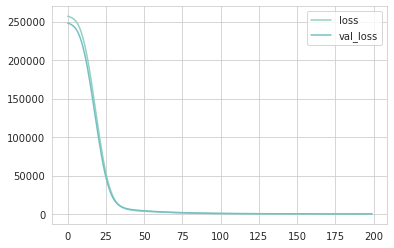

In [185]:
from tensorflow.keras.models import load_model
Ann.save('full_data_project_model.h5') 
losses = pd.DataFrame(Ann.history.history)
losses[['loss','val_loss']].plot()

In [186]:
y_pred6 = Ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[438.11 449.07]
 [489.47 482.6 ]
 [369.14 374.27]
 [513.64 513.15]
 [495.2  502.77]
 [451.09 461.78]
 [457.48 466.42]
 [335.51 327.38]
 [527.49 528.22]
 [664.02 657.02]
 [559.67 571.47]
 [525.86 523.63]
 [551.4  546.56]
 [457.15 467.43]
 [450.51 439.89]
 [433.57 445.06]
 [563.47 553.99]
 [407.22 403.77]
 [599.07 595.8 ]
 [486.41 490.74]
 [717.47 712.4 ]
 [496.3  502.09]
 [410.63 398.16]
 [556.63 570.45]
 [551.2  549.86]
 [396.59 392.99]
 [420.97 419.94]
 [393.77 407.66]
 [548.   521.14]
 [462.78 463.75]
 [559.41 556.3 ]
 [505.12 506.55]
 [505.3  514.34]
 [463.32 476.77]
 [441.36 418.6 ]
 [399.76 403.82]
 [502.98 506.13]
 [429.34 436.72]
 [569.45 558.95]
 [422.15 421.33]
 [486.24 478.26]
 [602.58 593.92]
 [616.78 632.12]
 [588.7  591.44]
 [448.91 444.29]
 [378.83 392.2 ]
 [558.75 558.43]
 [462.68 447.19]
 [502.13 475.73]
 [400.47 420.74]
 [523.81 527.78]
 [415.32 421.97]
 [577.11 576.03]
 [477.7  460.06]
 [456.37 452.63]
 [396.91 408.64]
 [565.55 557.25]
 [304.08 298.76]
 [562.02 555.0

In [187]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

MAE: 8.15800945720505
MSE: 111.42214239164079
RMSE: 10.555668732564545


0.9834377462851212

In [188]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# Cross-Validate
kf = KFold(n_splits=10, shuffle=True) # Use for KFold classification
    
oos_y = []
oos_pred = []
R2=[]
fold = 0

for train, test in kf.split(X_train):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1))
    ann1.compile(optimizer = 'adam', loss = 'mean_squared_error')
    from tensorflow.keras.callbacks import EarlyStopping
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    history=ann1.fit(x=x_train, 
          y=Y_train, 
          epochs=200,
          batch_size = 8,
          validation_data=(x_test, Y_test),
          callbacks=[early_stop]
          )
    
    
    pred = ann1.predict(x_test)
    
    oos_y.append(Y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    from sklearn.metrics import mean_squared_error
    score = np.sqrt(mean_squared_error(Y_test,pred))
    print(f"Fold score (RMSE): {score}")
    from sklearn.metrics import r2_score
    r2=r2_score(Y_test,pred)
    print("Fold score (R2_Score):",r2)
    R2.append(r2)

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(mean_squared_error(oos_pred,oos_y))
r2 = r2_score(oos_pred,oos_y)
print(f"Final, out of sample score (RMSE): {score}")   
print(f"Final, out of sample score (R2_Score): ",r2)   

# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
r2 = r2_score(holdout_pred,y_test)
score = np.sqrt(mean_squared_error(holdout_pred,y_test))
print(f"Holdout score (RMSE): {score}")
print(f"Final, out of sample score (R2_Score): ",r2)   


Fold #1
Epoch 1/200
45/45 [==============================] - 1s 5ms/step - loss: 255428.8594 - val_loss: 274470.8125
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 255068.8281 - val_loss: 274054.8125
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 254648.7500 - val_loss: 273513.3125
Epoch 4/200
45/45 [==============================] - 0s 5ms/step - loss: 254087.8906 - val_loss: 272790.5938
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 253331.2656 - val_loss: 271837.2500
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 252338.5625 - val_loss: 270608.5000
Epoch 7/200
45/45 [==============================] - 0s 5ms/step - loss: 251060.8438 - val_loss: 269064.8438
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 249463.6406 - val_loss: 267086.2188
Epoch 9/200
45/45 [==============================] - 0s 5ms/step - loss: 247465.3594 - val_loss: 264735.8125
Epoch 10/20

Epoch 77/200
45/45 [==============================] - 0s 3ms/step - loss: 2714.3865 - val_loss: 2016.3297
Epoch 78/200
45/45 [==============================] - 0s 3ms/step - loss: 2637.5449 - val_loss: 1965.7791
Epoch 79/200
45/45 [==============================] - 0s 3ms/step - loss: 2550.5405 - val_loss: 1920.0999
Epoch 80/200
45/45 [==============================] - 0s 3ms/step - loss: 2459.5125 - val_loss: 1876.4983
Epoch 81/200
45/45 [==============================] - 0s 2ms/step - loss: 2386.6013 - val_loss: 1826.6744
Epoch 82/200
45/45 [==============================] - 0s 3ms/step - loss: 2311.9275 - val_loss: 1796.5508
Epoch 83/200
45/45 [==============================] - 0s 3ms/step - loss: 2234.4788 - val_loss: 1746.5697
Epoch 84/200
45/45 [==============================] - 0s 3ms/step - loss: 2163.2639 - val_loss: 1710.0088
Epoch 85/200
45/45 [==============================] - 0s 3ms/step - loss: 2092.8831 - val_loss: 1672.9001
Epoch 86/200
45/45 [==========================

45/45 [==============================] - 0s 3ms/step - loss: 305.8136 - val_loss: 417.9044
Epoch 155/200
45/45 [==============================] - 0s 3ms/step - loss: 299.5292 - val_loss: 412.1607
Epoch 156/200
45/45 [==============================] - 0s 3ms/step - loss: 295.3607 - val_loss: 407.9426
Epoch 157/200
45/45 [==============================] - 0s 3ms/step - loss: 287.7859 - val_loss: 403.5963
Epoch 158/200
45/45 [==============================] - 0s 3ms/step - loss: 283.2158 - val_loss: 399.2782
Epoch 159/200
45/45 [==============================] - 0s 3ms/step - loss: 276.6100 - val_loss: 394.3441
Epoch 160/200
45/45 [==============================] - 0s 3ms/step - loss: 272.4835 - val_loss: 392.4746
Epoch 161/200
45/45 [==============================] - 0s 3ms/step - loss: 266.6384 - val_loss: 381.1625
Epoch 162/200
45/45 [==============================] - 0s 3ms/step - loss: 262.8466 - val_loss: 382.0375
Epoch 163/200
45/45 [==============================] - 0s 3ms/step - 

45/45 [==============================] - 0s 3ms/step - loss: 131979.2031 - val_loss: 110779.4531
Epoch 31/200
45/45 [==============================] - 0s 3ms/step - loss: 123646.8125 - val_loss: 102465.5938
Epoch 32/200
45/45 [==============================] - 0s 3ms/step - loss: 115310.0234 - val_loss: 94588.8281
Epoch 33/200
45/45 [==============================] - 0s 3ms/step - loss: 107202.3750 - val_loss: 86847.2031
Epoch 34/200
45/45 [==============================] - 0s 3ms/step - loss: 99195.1875 - val_loss: 79515.6406
Epoch 35/200
45/45 [==============================] - 0s 3ms/step - loss: 91463.6250 - val_loss: 72564.6094
Epoch 36/200
45/45 [==============================] - 0s 3ms/step - loss: 84017.6641 - val_loss: 65906.5000
Epoch 37/200
45/45 [==============================] - 0s 3ms/step - loss: 76885.3203 - val_loss: 59689.6484
Epoch 38/200
45/45 [==============================] - 0s 3ms/step - loss: 70098.7891 - val_loss: 53894.3945
Epoch 39/200
45/45 [===============

Epoch 107/200
45/45 [==============================] - 0s 3ms/step - loss: 1184.1595 - val_loss: 1313.9000
Epoch 108/200
45/45 [==============================] - 0s 3ms/step - loss: 1149.1660 - val_loss: 1272.8354
Epoch 109/200
45/45 [==============================] - 0s 3ms/step - loss: 1116.1750 - val_loss: 1232.5640
Epoch 110/200
45/45 [==============================] - 0s 3ms/step - loss: 1086.8214 - val_loss: 1197.2653
Epoch 111/200
45/45 [==============================] - 0s 3ms/step - loss: 1054.6377 - val_loss: 1154.8700
Epoch 112/200
45/45 [==============================] - 0s 3ms/step - loss: 1022.4807 - val_loss: 1116.3151
Epoch 113/200
45/45 [==============================] - 0s 3ms/step - loss: 993.1626 - val_loss: 1081.2782
Epoch 114/200
45/45 [==============================] - 0s 3ms/step - loss: 965.2387 - val_loss: 1043.9543
Epoch 115/200
45/45 [==============================] - 0s 3ms/step - loss: 936.0863 - val_loss: 1014.6393
Epoch 116/200
45/45 [===================

Epoch 185/200
45/45 [==============================] - 0s 3ms/step - loss: 168.1622 - val_loss: 127.7898
Epoch 186/200
45/45 [==============================] - 0s 3ms/step - loss: 165.6099 - val_loss: 124.9161
Epoch 187/200
45/45 [==============================] - 0s 3ms/step - loss: 164.5444 - val_loss: 124.3596
Epoch 188/200
45/45 [==============================] - 0s 3ms/step - loss: 162.1630 - val_loss: 121.6116
Epoch 189/200
45/45 [==============================] - 0s 3ms/step - loss: 160.3754 - val_loss: 121.0280
Epoch 190/200
45/45 [==============================] - 0s 3ms/step - loss: 158.6316 - val_loss: 117.6084
Epoch 191/200
45/45 [==============================] - 0s 3ms/step - loss: 157.3006 - val_loss: 115.8463
Epoch 192/200
45/45 [==============================] - 0s 3ms/step - loss: 155.7711 - val_loss: 116.3421
Epoch 193/200
45/45 [==============================] - 0s 3ms/step - loss: 154.5918 - val_loss: 112.8624
Epoch 194/200
45/45 [==============================] - 

45/45 [==============================] - 0s 3ms/step - loss: 3151.1392 - val_loss: 5137.0405
Epoch 61/200
45/45 [==============================] - 0s 3ms/step - loss: 3018.7268 - val_loss: 5011.8311
Epoch 62/200
45/45 [==============================] - 0s 3ms/step - loss: 2901.0996 - val_loss: 4883.0122
Epoch 63/200
45/45 [==============================] - 0s 3ms/step - loss: 2799.2544 - val_loss: 4767.4263
Epoch 64/200
45/45 [==============================] - 0s 3ms/step - loss: 2704.7258 - val_loss: 4674.4922
Epoch 65/200
45/45 [==============================] - 0s 3ms/step - loss: 2617.6223 - val_loss: 4560.8657
Epoch 66/200
45/45 [==============================] - 0s 3ms/step - loss: 2538.6301 - val_loss: 4471.8721
Epoch 67/200
45/45 [==============================] - 0s 3ms/step - loss: 2466.3794 - val_loss: 4354.5469
Epoch 68/200
45/45 [==============================] - 0s 3ms/step - loss: 2393.6372 - val_loss: 4281.5630
Epoch 69/200
45/45 [==============================] - 0s 3m

45/45 [==============================] - 0s 2ms/step - loss: 372.5296 - val_loss: 734.4464
Epoch 138/200
45/45 [==============================] - 0s 3ms/step - loss: 362.6115 - val_loss: 716.8490
Epoch 139/200
45/45 [==============================] - 0s 3ms/step - loss: 354.2296 - val_loss: 701.2639
Epoch 140/200
45/45 [==============================] - 0s 3ms/step - loss: 345.2920 - val_loss: 679.7859
Epoch 141/200
45/45 [==============================] - 0s 3ms/step - loss: 337.5570 - val_loss: 665.2877
Epoch 142/200
45/45 [==============================] - 0s 3ms/step - loss: 328.9964 - val_loss: 653.7587
Epoch 143/200
45/45 [==============================] - 0s 2ms/step - loss: 320.2305 - val_loss: 629.3867
Epoch 144/200
45/45 [==============================] - 0s 3ms/step - loss: 313.3973 - val_loss: 609.9611
Epoch 145/200
45/45 [==============================] - 0s 3ms/step - loss: 304.6094 - val_loss: 609.5451
Epoch 146/200
45/45 [==============================] - 0s 3ms/step - 

Epoch 14/200
45/45 [==============================] - 0s 3ms/step - loss: 227185.5781 - val_loss: 231403.5938
Epoch 15/200
45/45 [==============================] - 0s 3ms/step - loss: 221115.1562 - val_loss: 224911.6719
Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 214323.3125 - val_loss: 217936.9531
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 206955.4688 - val_loss: 210453.5781
Epoch 18/200
45/45 [==============================] - 0s 3ms/step - loss: 199080.6406 - val_loss: 202092.2500
Epoch 19/200
45/45 [==============================] - 0s 3ms/step - loss: 190526.3281 - val_loss: 193419.1562
Epoch 20/200
45/45 [==============================] - 0s 3ms/step - loss: 181541.1875 - val_loss: 184052.1250
Epoch 21/200
45/45 [==============================] - 0s 3ms/step - loss: 172013.4375 - val_loss: 174284.6875
Epoch 22/200
45/45 [==============================] - 0s 4ms/step - loss: 162084.2656 - val_loss: 163964.8438
Epoch 23/2

45/45 [==============================] - 0s 3ms/step - loss: 1389.4097 - val_loss: 972.5949
Epoch 91/200
45/45 [==============================] - 0s 3ms/step - loss: 1349.8228 - val_loss: 941.1237
Epoch 92/200
45/45 [==============================] - 0s 3ms/step - loss: 1313.2389 - val_loss: 922.5068
Epoch 93/200
45/45 [==============================] - 0s 3ms/step - loss: 1280.5129 - val_loss: 882.7988
Epoch 94/200
45/45 [==============================] - 0s 3ms/step - loss: 1245.0515 - val_loss: 873.6152
Epoch 95/200
45/45 [==============================] - 0s 3ms/step - loss: 1211.6151 - val_loss: 848.2366
Epoch 96/200
45/45 [==============================] - 0s 3ms/step - loss: 1180.7306 - val_loss: 825.6068
Epoch 97/200
45/45 [==============================] - 0s 3ms/step - loss: 1148.8826 - val_loss: 812.1584
Epoch 98/200
45/45 [==============================] - 0s 2ms/step - loss: 1116.7968 - val_loss: 786.3954
Epoch 99/200
45/45 [==============================] - 0s 3ms/step - 

45/45 [==============================] - 0s 3ms/step - loss: 213.6600 - val_loss: 180.3023
Epoch 169/200
45/45 [==============================] - 0s 3ms/step - loss: 209.3336 - val_loss: 176.6703
Epoch 170/200
45/45 [==============================] - 0s 3ms/step - loss: 205.6109 - val_loss: 173.6571
Epoch 171/200
45/45 [==============================] - 0s 3ms/step - loss: 202.4500 - val_loss: 172.9541
Epoch 172/200
45/45 [==============================] - 0s 3ms/step - loss: 198.4583 - val_loss: 171.1109
Epoch 173/200
45/45 [==============================] - 0s 3ms/step - loss: 196.6400 - val_loss: 169.2522
Epoch 174/200
45/45 [==============================] - 0s 3ms/step - loss: 191.8508 - val_loss: 167.1282
Epoch 175/200
45/45 [==============================] - 0s 3ms/step - loss: 189.0055 - val_loss: 163.5828
Epoch 176/200
45/45 [==============================] - 0s 3ms/step - loss: 186.1517 - val_loss: 163.4118
Epoch 177/200
45/45 [==============================] - 0s 3ms/step - 

Epoch 37/200
45/45 [==============================] - 0s 3ms/step - loss: 54636.1602 - val_loss: 52152.1367
Epoch 38/200
45/45 [==============================] - 0s 3ms/step - loss: 48392.5938 - val_loss: 46275.0078
Epoch 39/200
45/45 [==============================] - 0s 3ms/step - loss: 42755.5078 - val_loss: 40825.8867
Epoch 40/200
45/45 [==============================] - 0s 3ms/step - loss: 37584.2305 - val_loss: 36035.9219
Epoch 41/200
45/45 [==============================] - 0s 3ms/step - loss: 33005.1680 - val_loss: 31512.7461
Epoch 42/200
45/45 [==============================] - 0s 3ms/step - loss: 28807.5215 - val_loss: 27725.1523
Epoch 43/200
45/45 [==============================] - 0s 4ms/step - loss: 25184.0391 - val_loss: 24188.1973
Epoch 44/200
45/45 [==============================] - 0s 3ms/step - loss: 21930.1523 - val_loss: 21155.1484
Epoch 45/200
45/45 [==============================] - 0s 4ms/step - loss: 19092.1289 - val_loss: 18494.9688
Epoch 46/200
45/45 [========

45/45 [==============================] - 0s 3ms/step - loss: 666.5244 - val_loss: 386.9745
Epoch 115/200
45/45 [==============================] - 0s 3ms/step - loss: 646.6452 - val_loss: 373.6266
Epoch 116/200
45/45 [==============================] - 0s 3ms/step - loss: 627.0287 - val_loss: 364.9242
Epoch 117/200
45/45 [==============================] - 0s 3ms/step - loss: 608.4974 - val_loss: 357.9281
Epoch 118/200
45/45 [==============================] - 0s 3ms/step - loss: 590.4131 - val_loss: 346.3614
Epoch 119/200
45/45 [==============================] - 0s 3ms/step - loss: 574.2151 - val_loss: 338.9622
Epoch 120/200
45/45 [==============================] - 0s 3ms/step - loss: 557.7542 - val_loss: 328.7705
Epoch 121/200
45/45 [==============================] - 0s 3ms/step - loss: 539.7926 - val_loss: 317.8160
Epoch 122/200
45/45 [==============================] - 0s 3ms/step - loss: 524.3705 - val_loss: 309.2957
Epoch 123/200
45/45 [==============================] - 0s 3ms/step - 

45/45 [==============================] - 0s 4ms/step - loss: 130.5441 - val_loss: 163.8801
Epoch 193/200
45/45 [==============================] - 0s 4ms/step - loss: 129.9027 - val_loss: 166.2616
Epoch 194/200
45/45 [==============================] - 0s 4ms/step - loss: 128.3675 - val_loss: 165.9315
Epoch 195/200
45/45 [==============================] - 0s 3ms/step - loss: 127.8060 - val_loss: 166.1662
Epoch 196/200
45/45 [==============================] - 0s 4ms/step - loss: 127.3786 - val_loss: 167.1336
Epoch 197/200
45/45 [==============================] - 0s 4ms/step - loss: 125.9368 - val_loss: 168.2140
Epoch 198/200
45/45 [==============================] - 0s 3ms/step - loss: 125.2377 - val_loss: 167.7414
Epoch 199/200
45/45 [==============================] - 0s 3ms/step - loss: 125.6587 - val_loss: 166.9666
Epoch 200/200
45/45 [==============================] - 0s 3ms/step - loss: 124.1755 - val_loss: 169.2061
Fold score (RMSE): 13.007924396595124
Fold score (R2_Score): 0.976243

45/45 [==============================] - 0s 3ms/step - loss: 2873.5200 - val_loss: 2418.5371
Epoch 61/200
45/45 [==============================] - 0s 3ms/step - loss: 2773.9902 - val_loss: 2331.3960
Epoch 62/200
45/45 [==============================] - 0s 3ms/step - loss: 2677.8208 - val_loss: 2244.2827
Epoch 63/200
45/45 [==============================] - 0s 3ms/step - loss: 2597.3213 - val_loss: 2169.1133
Epoch 64/200
45/45 [==============================] - 0s 3ms/step - loss: 2506.9536 - val_loss: 2093.3931
Epoch 65/200
45/45 [==============================] - 0s 3ms/step - loss: 2427.8875 - val_loss: 2027.5312
Epoch 66/200
45/45 [==============================] - 0s 3ms/step - loss: 2352.3965 - val_loss: 1970.1287
Epoch 67/200
45/45 [==============================] - 0s 3ms/step - loss: 2269.8831 - val_loss: 1902.3733
Epoch 68/200
45/45 [==============================] - 0s 2ms/step - loss: 2198.8909 - val_loss: 1835.7289
Epoch 69/200
45/45 [==============================] - 0s 3m

Epoch 138/200
45/45 [==============================] - 0s 3ms/step - loss: 262.5070 - val_loss: 463.0136
Epoch 139/200
45/45 [==============================] - 0s 3ms/step - loss: 257.1948 - val_loss: 461.3185
Epoch 140/200
45/45 [==============================] - 0s 3ms/step - loss: 249.9764 - val_loss: 452.0522
Epoch 141/200
45/45 [==============================] - 0s 3ms/step - loss: 244.3528 - val_loss: 446.5574
Epoch 142/200
45/45 [==============================] - 0s 3ms/step - loss: 241.0585 - val_loss: 441.0917
Epoch 143/200
45/45 [==============================] - 0s 3ms/step - loss: 233.2339 - val_loss: 430.5908
Epoch 144/200
45/45 [==============================] - 0s 3ms/step - loss: 229.2939 - val_loss: 423.8861
Epoch 145/200
45/45 [==============================] - 0s 3ms/step - loss: 224.0877 - val_loss: 419.1169
Epoch 146/200
45/45 [==============================] - 0s 3ms/step - loss: 219.6504 - val_loss: 418.9044
Epoch 147/200
45/45 [==============================] - 

45/45 [==============================] - 0s 3ms/step - loss: 201749.2812 - val_loss: 193758.7656
Epoch 15/200
45/45 [==============================] - 0s 2ms/step - loss: 191454.0938 - val_loss: 182777.6562
Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 180308.6406 - val_loss: 171258.1562
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 168527.6719 - val_loss: 159277.4844
Epoch 18/200
45/45 [==============================] - 0s 3ms/step - loss: 156387.2969 - val_loss: 146610.9688
Epoch 19/200
45/45 [==============================] - 0s 2ms/step - loss: 143786.7812 - val_loss: 134028.8281
Epoch 20/200
45/45 [==============================] - 0s 3ms/step - loss: 131152.6719 - val_loss: 121399.0469
Epoch 21/200
45/45 [==============================] - 0s 3ms/step - loss: 118610.0781 - val_loss: 108817.7031
Epoch 22/200
45/45 [==============================] - 0s 3ms/step - loss: 106240.1562 - val_loss: 96677.5391
Epoch 23/200
45/45 [====

45/45 [==============================] - 0s 3ms/step - loss: 761.3384 - val_loss: 698.7352
Epoch 92/200
45/45 [==============================] - 0s 3ms/step - loss: 739.9695 - val_loss: 676.5016
Epoch 93/200
45/45 [==============================] - 0s 3ms/step - loss: 716.9867 - val_loss: 657.7113
Epoch 94/200
45/45 [==============================] - 0s 3ms/step - loss: 696.0504 - val_loss: 636.7920
Epoch 95/200
45/45 [==============================] - 0s 3ms/step - loss: 676.7339 - val_loss: 619.3167
Epoch 96/200
45/45 [==============================] - 0s 3ms/step - loss: 657.7285 - val_loss: 606.9355
Epoch 97/200
45/45 [==============================] - 0s 3ms/step - loss: 637.0122 - val_loss: 587.5654
Epoch 98/200
45/45 [==============================] - 0s 3ms/step - loss: 618.7432 - val_loss: 568.6134
Epoch 99/200
45/45 [==============================] - 0s 3ms/step - loss: 599.2912 - val_loss: 551.6523
Epoch 100/200
45/45 [==============================] - 0s 2ms/step - loss: 58

45/45 [==============================] - 0s 3ms/step - loss: 140.9514 - val_loss: 92.0929
Epoch 170/200
45/45 [==============================] - 0s 3ms/step - loss: 139.7146 - val_loss: 91.9911
Epoch 171/200
45/45 [==============================] - 0s 3ms/step - loss: 138.6706 - val_loss: 90.7533
Epoch 172/200
45/45 [==============================] - 0s 3ms/step - loss: 137.6597 - val_loss: 87.7679
Epoch 173/200
45/45 [==============================] - 0s 3ms/step - loss: 136.5095 - val_loss: 87.8289
Epoch 174/200
45/45 [==============================] - 0s 2ms/step - loss: 135.5993 - val_loss: 87.5812
Epoch 175/200
45/45 [==============================] - 0s 3ms/step - loss: 135.4046 - val_loss: 86.4707
Epoch 176/200
45/45 [==============================] - 0s 3ms/step - loss: 134.3267 - val_loss: 86.1262
Epoch 177/200
45/45 [==============================] - 0s 3ms/step - loss: 133.4913 - val_loss: 83.5433
Epoch 178/200
45/45 [==============================] - 0s 3ms/step - loss: 133

45/45 [==============================] - 0s 3ms/step - loss: 3394.1001 - val_loss: 2988.7031
Epoch 46/200
45/45 [==============================] - 0s 3ms/step - loss: 3031.6924 - val_loss: 2650.4917
Epoch 47/200
45/45 [==============================] - 0s 4ms/step - loss: 2758.2361 - val_loss: 2384.5803
Epoch 48/200
45/45 [==============================] - 0s 3ms/step - loss: 2555.7485 - val_loss: 2161.3772
Epoch 49/200
45/45 [==============================] - 0s 3ms/step - loss: 2394.3813 - val_loss: 1986.9733
Epoch 50/200
45/45 [==============================] - 0s 3ms/step - loss: 2273.2083 - val_loss: 1854.4138
Epoch 51/200
45/45 [==============================] - 0s 3ms/step - loss: 2176.8215 - val_loss: 1745.3640
Epoch 52/200
45/45 [==============================] - 0s 3ms/step - loss: 2102.0010 - val_loss: 1642.5055
Epoch 53/200
45/45 [==============================] - 0s 3ms/step - loss: 2036.9989 - val_loss: 1557.8558
Epoch 54/200
45/45 [==============================] - 0s 3m

45/45 [==============================] - 0s 3ms/step - loss: 388.2613 - val_loss: 281.0503
Epoch 124/200
45/45 [==============================] - 0s 2ms/step - loss: 378.2087 - val_loss: 275.4213
Epoch 125/200
45/45 [==============================] - 0s 3ms/step - loss: 368.9176 - val_loss: 272.7986
Epoch 126/200
45/45 [==============================] - 0s 3ms/step - loss: 360.0932 - val_loss: 268.8770
Epoch 127/200
45/45 [==============================] - 0s 3ms/step - loss: 350.3908 - val_loss: 265.6080
Epoch 128/200
45/45 [==============================] - 0s 3ms/step - loss: 343.1938 - val_loss: 262.4195
Epoch 129/200
45/45 [==============================] - 0s 3ms/step - loss: 334.9788 - val_loss: 260.0306
Epoch 130/200
45/45 [==============================] - 0s 3ms/step - loss: 327.8990 - val_loss: 252.1164
Epoch 131/200
45/45 [==============================] - 0s 3ms/step - loss: 320.4074 - val_loss: 256.8168
Epoch 132/200
45/45 [==============================] - 0s 3ms/step - 

Epoch 1/200
45/45 [==============================] - 1s 6ms/step - loss: 257495.8438 - val_loss: 256726.9531
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 257106.7188 - val_loss: 256380.5312
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 256763.7812 - val_loss: 256031.3438
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 256400.0000 - val_loss: 255635.9531
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 255976.2656 - val_loss: 255159.9219
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 255462.9844 - val_loss: 254573.7812
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 254832.9375 - val_loss: 253850.5000
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 254064.0000 - val_loss: 252971.8281
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 253123.2500 - val_loss: 251926.6250
Epoch 10/200
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 2466.5974 - val_loss: 1796.9778
Epoch 77/200
45/45 [==============================] - 0s 3ms/step - loss: 2368.2856 - val_loss: 1700.4310
Epoch 78/200
45/45 [==============================] - 0s 3ms/step - loss: 2286.2876 - val_loss: 1603.3619
Epoch 79/200
45/45 [==============================] - 0s 3ms/step - loss: 2214.0015 - val_loss: 1524.2875
Epoch 80/200
45/45 [==============================] - 0s 3ms/step - loss: 2152.6162 - val_loss: 1462.6383
Epoch 81/200
45/45 [==============================] - 0s 3ms/step - loss: 2093.0625 - val_loss: 1399.7534
Epoch 82/200
45/45 [==============================] - 0s 2ms/step - loss: 2042.1078 - val_loss: 1353.5146
Epoch 83/200
45/45 [==============================] - 0s 3ms/step - loss: 1993.0087 - val_loss: 1302.8779
Epoch 84/200
45/45 [==============================] - 0s 2ms/step - loss: 1949.9551 - val_loss: 1262.3324
Epoch 85/200
45/45 [==============================] - 0s 2m

Epoch 154/200
45/45 [==============================] - 0s 3ms/step - loss: 356.5907 - val_loss: 233.1647
Epoch 155/200
45/45 [==============================] - 0s 4ms/step - loss: 349.2713 - val_loss: 225.4476
Epoch 156/200
45/45 [==============================] - 0s 3ms/step - loss: 342.4404 - val_loss: 219.3303
Epoch 157/200
45/45 [==============================] - 0s 3ms/step - loss: 336.6823 - val_loss: 218.3108
Epoch 158/200
45/45 [==============================] - 0s 3ms/step - loss: 330.4766 - val_loss: 211.2198
Epoch 159/200
45/45 [==============================] - 0s 3ms/step - loss: 324.0251 - val_loss: 208.4450
Epoch 160/200
45/45 [==============================] - 0s 3ms/step - loss: 318.4156 - val_loss: 205.0378
Epoch 161/200
45/45 [==============================] - 0s 3ms/step - loss: 313.1616 - val_loss: 199.0254
Epoch 162/200
45/45 [==============================] - 0s 3ms/step - loss: 308.0732 - val_loss: 196.4172
Epoch 163/200
45/45 [==============================] - 

Epoch 30/200
45/45 [==============================] - 0s 3ms/step - loss: 82244.3672 - val_loss: 86144.3125
Epoch 31/200
45/45 [==============================] - 0s 3ms/step - loss: 71841.2344 - val_loss: 76145.5391
Epoch 32/200
45/45 [==============================] - 0s 3ms/step - loss: 62289.2266 - val_loss: 66817.9219
Epoch 33/200
45/45 [==============================] - 0s 3ms/step - loss: 53619.4609 - val_loss: 58194.4062
Epoch 34/200
45/45 [==============================] - 0s 4ms/step - loss: 45823.3242 - val_loss: 50371.7500
Epoch 35/200
45/45 [==============================] - 0s 4ms/step - loss: 38943.7070 - val_loss: 43324.9766
Epoch 36/200
45/45 [==============================] - 0s 4ms/step - loss: 32930.2031 - val_loss: 37259.9570
Epoch 37/200
45/45 [==============================] - 0s 3ms/step - loss: 27760.2891 - val_loss: 32084.6816
Epoch 38/200
45/45 [==============================] - 0s 3ms/step - loss: 23426.5508 - val_loss: 27415.2500
Epoch 39/200
45/45 [========

45/45 [==============================] - 0s 3ms/step - loss: 672.0995 - val_loss: 636.0002
Epoch 108/200
45/45 [==============================] - 0s 2ms/step - loss: 654.1650 - val_loss: 618.2962
Epoch 109/200
45/45 [==============================] - 0s 3ms/step - loss: 638.0351 - val_loss: 601.7216
Epoch 110/200
45/45 [==============================] - 0s 3ms/step - loss: 619.3017 - val_loss: 584.4733
Epoch 111/200
45/45 [==============================] - 0s 3ms/step - loss: 603.0510 - val_loss: 562.9564
Epoch 112/200
45/45 [==============================] - 0s 3ms/step - loss: 587.2881 - val_loss: 550.5959
Epoch 113/200
45/45 [==============================] - 0s 3ms/step - loss: 571.7441 - val_loss: 536.1963
Epoch 114/200
45/45 [==============================] - 0s 3ms/step - loss: 557.4869 - val_loss: 518.8469
Epoch 115/200
45/45 [==============================] - 0s 3ms/step - loss: 541.8061 - val_loss: 505.7632
Epoch 116/200
45/45 [==============================] - 0s 3ms/step - 

45/45 [==============================] - 0s 3ms/step - loss: 128.6628 - val_loss: 123.2862
Epoch 186/200
45/45 [==============================] - 0s 3ms/step - loss: 126.5016 - val_loss: 122.9009
Epoch 187/200
45/45 [==============================] - 0s 3ms/step - loss: 125.8786 - val_loss: 123.1773
Epoch 188/200
45/45 [==============================] - 0s 3ms/step - loss: 125.3564 - val_loss: 127.6062
Epoch 189/200
45/45 [==============================] - 0s 3ms/step - loss: 123.5922 - val_loss: 121.5713
Epoch 190/200
45/45 [==============================] - 0s 3ms/step - loss: 122.6131 - val_loss: 126.6562
Epoch 191/200
45/45 [==============================] - 0s 3ms/step - loss: 122.0096 - val_loss: 122.5847
Epoch 192/200
45/45 [==============================] - 0s 3ms/step - loss: 120.9035 - val_loss: 120.7075
Epoch 193/200
45/45 [==============================] - 0s 3ms/step - loss: 120.6981 - val_loss: 121.0836
Epoch 194/200
45/45 [==============================] - 0s 3ms/step - 

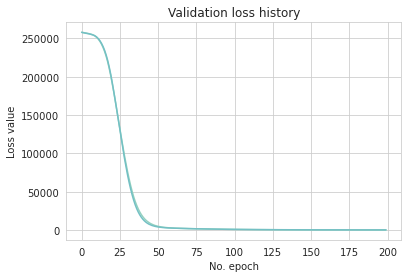

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

In [190]:
oos_pred

array([[496.  ],
       [537.15],
       [592.16],
       [548.84],
       [422.54],
       [424.92],
       [575.91],
       [646.87],
       [496.7 ],
       [534.55],
       [535.17],
       [555.11],
       [330.35],
       [473.73],
       [527.59],
       [543.98],
       [437.02],
       [564.63],
       [479.43],
       [596.67],
       [536.32],
       [461.86],
       [563.19],
       [549.6 ],
       [418.01],
       [459.54],
       [663.65],
       [677.51],
       [735.52],
       [423.99],
       [444.18],
       [407.7 ],
       [422.5 ],
       [601.53],
       [458.25],
       [447.02],
       [479.25],
       [623.34],
       [479.46],
       [669.86],
       [494.16],
       [599.67],
       [664.93],
       [481.47],
       [512.28],
       [431.86],
       [480.61],
       [408.29],
       [484.03],
       [474.67],
       [487.46],
       [409.06],
       [500.35],
       [516.33],
       [533.82],
       [480.3 ],
       [601.49],
       [556.72],
       [460.72

In [191]:
oos_y

array([503.98, 486.95, 594.27, 538.77, 411.19, 434.02, 564.79, 627.6 ,
       514.24, 540.26, 541.05, 550.05, 319.93, 484.88, 532.94, 536.42,
       448.23, 536.77, 486.84, 586.16, 532.75, 446.42, 573.42, 512.17,
       444.55, 457.85, 663.07, 660.43, 725.58, 430.59, 442.36, 399.98,
       436.58, 581.31, 452.12, 444.58, 498.64, 616.66, 473.36, 666.13,
       483.67, 597.74, 637.1 , 482.35, 505.11, 434.14, 467.8 , 407.7 ,
       497.59, 482.83, 491.07, 408.96, 507.21, 521.88, 528.93, 476.19,
       604.33, 551.62, 459.29, 640.19, 581.85, 544.78, 487.56, 314.44,
       347.78, 538.94, 590.56, 531.96, 592.69, 573.31, 392.5 , 382.42,
       548.28, 503.22, 521.24, 424.73, 490.6 , 465.18, 424.68, 393.86,
       282.47, 433.05, 570.2 , 524.64, 556.19, 436.28, 537.92, 436.52,
       387.53, 497.39, 581.8 , 426.78, 302.19, 487.55, 479.61, 424.76,
       593.16, 508.77, 266.09, 533.4 , 493.18, 431.62, 510.66, 573.85,
       541.23, 557.63, 493.72, 511.04, 537.22, 494.69, 357.86, 501.75,
      

In [192]:
mean=sum(R2)/len(R2)

In [193]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5

In [194]:
res*100

1.5669217141061256